In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import itertools


# Simple SGD plotting
Do stuff here...


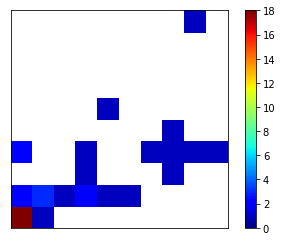

In [12]:
def plot_sgd(sgd, ax="", dims=2):

    if dims == 1:
        one_d_array = np.sum(sgd, axis=0)
        sgd = np.array([one_d_array])

    cmap = plt.cm.get_cmap("jet")
    cmap.set_under('white')


    ## This along with the 'vmin' arg for pcolormesh actually sets the background to white
    eps = np.spacing(0.00001)

    if ax:
        fig = plt.gcf()
    else:
        fig, ax = plt.subplots(1)

    ax.set_aspect("equal")

    np.random.seed(10)

    p = ax.pcolormesh(sgd, cmap=cmap, vmin=eps)
    fig.colorbar(p)

    plt.tick_params(
        axis='both',       # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        left=False,
        labelleft=False,
        labelbottom=False) # labels along the bottom edge are off


wat = pd.read_csv("MESS/constant_MESS/SIMOUT.txt", sep="\t")

## Encapsulate the data munging? Pass in an ax?
sgd = wat["sgd"][6].replace("[", "").replace("]", "")
sgd = np.fromstring(sgd, dtype=np.int, sep=' ')
sgd = sgd.reshape(10, 10)

fig, ax = plt.subplots(1)
plot_sgd(sgd, ax=ax, dims=2)

# Figure 1

# Figure 2

In [6]:
import glob
## Get megalog files
constant = glob.glob("MESS/constant_MESS/wat-*/*megalog.txt")
print(len(constant))

harmonic = glob.glob("MESS/harmonic_MESS/wat-*/*megalog.txt")
print(len(harmonic))

harmlessmig = glob.glob("MESS/lessmig_MESS/wat-*/*megalog.txt")
print(len(harmlessmig))

constlessmig = glob.glob("MESS/constlessmig_MESS/wat-*/*megalog.txt")
print(len(constlessmig))

harmonic_5k = glob.glob("MESS/5kharm_MESS/wat-*/*megalog.txt")
print(len(constlessmig))

harmonic_vlow = glob.glob("MESS/harmvlowmig_MESS/wat-*/*megalog.txt")
print(len(constlessmig))

lambdas = [0.05, 0.1, 0.25, 0.5, 0.75, 1]

10000
9997
9995
9998
9998
9998


In [15]:
harm5k_vlow = glob.glob("MESS/5kharm-lowmig_MESS/wat-*/*megalog.txt")
print(len(harm5k_vlow))

100


In [17]:
## Use different lambda values if you please
def populate_lambda_dists(megalogs, lambdas=lambdas):
    ## Accumulate data
    lambda_dict = {x:[] for x in lambdas}
    tolerance = 0.05

    for f in megalogs:
        ## get lambda
        lamb = float(f.split("/")[-1].split("-")[1])

        for l in lambdas:
            if abs(l - lamb) < tolerance:
                lambda_dict[l].append(f)

    for l in lambdas:
        list_of_df = [pd.read_csv(x).dropna() for x in lambda_dict[l]]
        for i, x in enumerate(list_of_df):
            x.drop(x["Ne_local"].idxmax(), inplace=True)
            list_of_df[i] = x
        #list_of_df = [y.drop(y["Ne_local"].idxmax() for y in list_of_df)]
        lambda_dict[l] = pd.concat(list_of_df)

    print([len(x) for x in lambda_dict.values()])
    
    return lambda_dict


def plot_pi_dxys(megalogs):

    lambda_dict = populate_lambda_dists(megalogs)

    from matplotlib.colors import LogNorm

    f, axarr = plt.subplots(2, 3, figsize=(8,4), dpi=300, sharex=True, sharey=True)
    axarr = [a for b in axarr for a in b]
    cmap="jet"
    rang=[[0.001, 0.05], [0, 0.06]]
    for i, k, ax in zip(xrange(0,6), lambdas, axarr):
        ax.set_title(u"Λ = {}".format(k), fontsize=10)
        _, _, _, im = ax.hist2d(lambda_dict[k]["pi_local"], lambda_dict[k]["dxy"], bins=30, cmap=cmap, norm=LogNorm(), normed=True, range=rang)
    f.text(0.5, 0.01, u"Nucleotide diversity (π)", ha='center', fontsize=13)
    f.text(0.04, 0.5, r"Absolute divergence ($D_{xy}$)", va='center', rotation='vertical', fontsize=13)
    plt.suptitle("Joint distribution of genetic diversity/divergence through time", y=.9999, fontsize=15)
    plt.subplots_adjust(hspace=.25)

    cb_ax = f.add_axes([0.93, 0.12, 0.015, 0.76])
    cbar = f.colorbar(im, cax=cb_ax)

[14753, 15565, 7925, 11190, 8174, 16726]


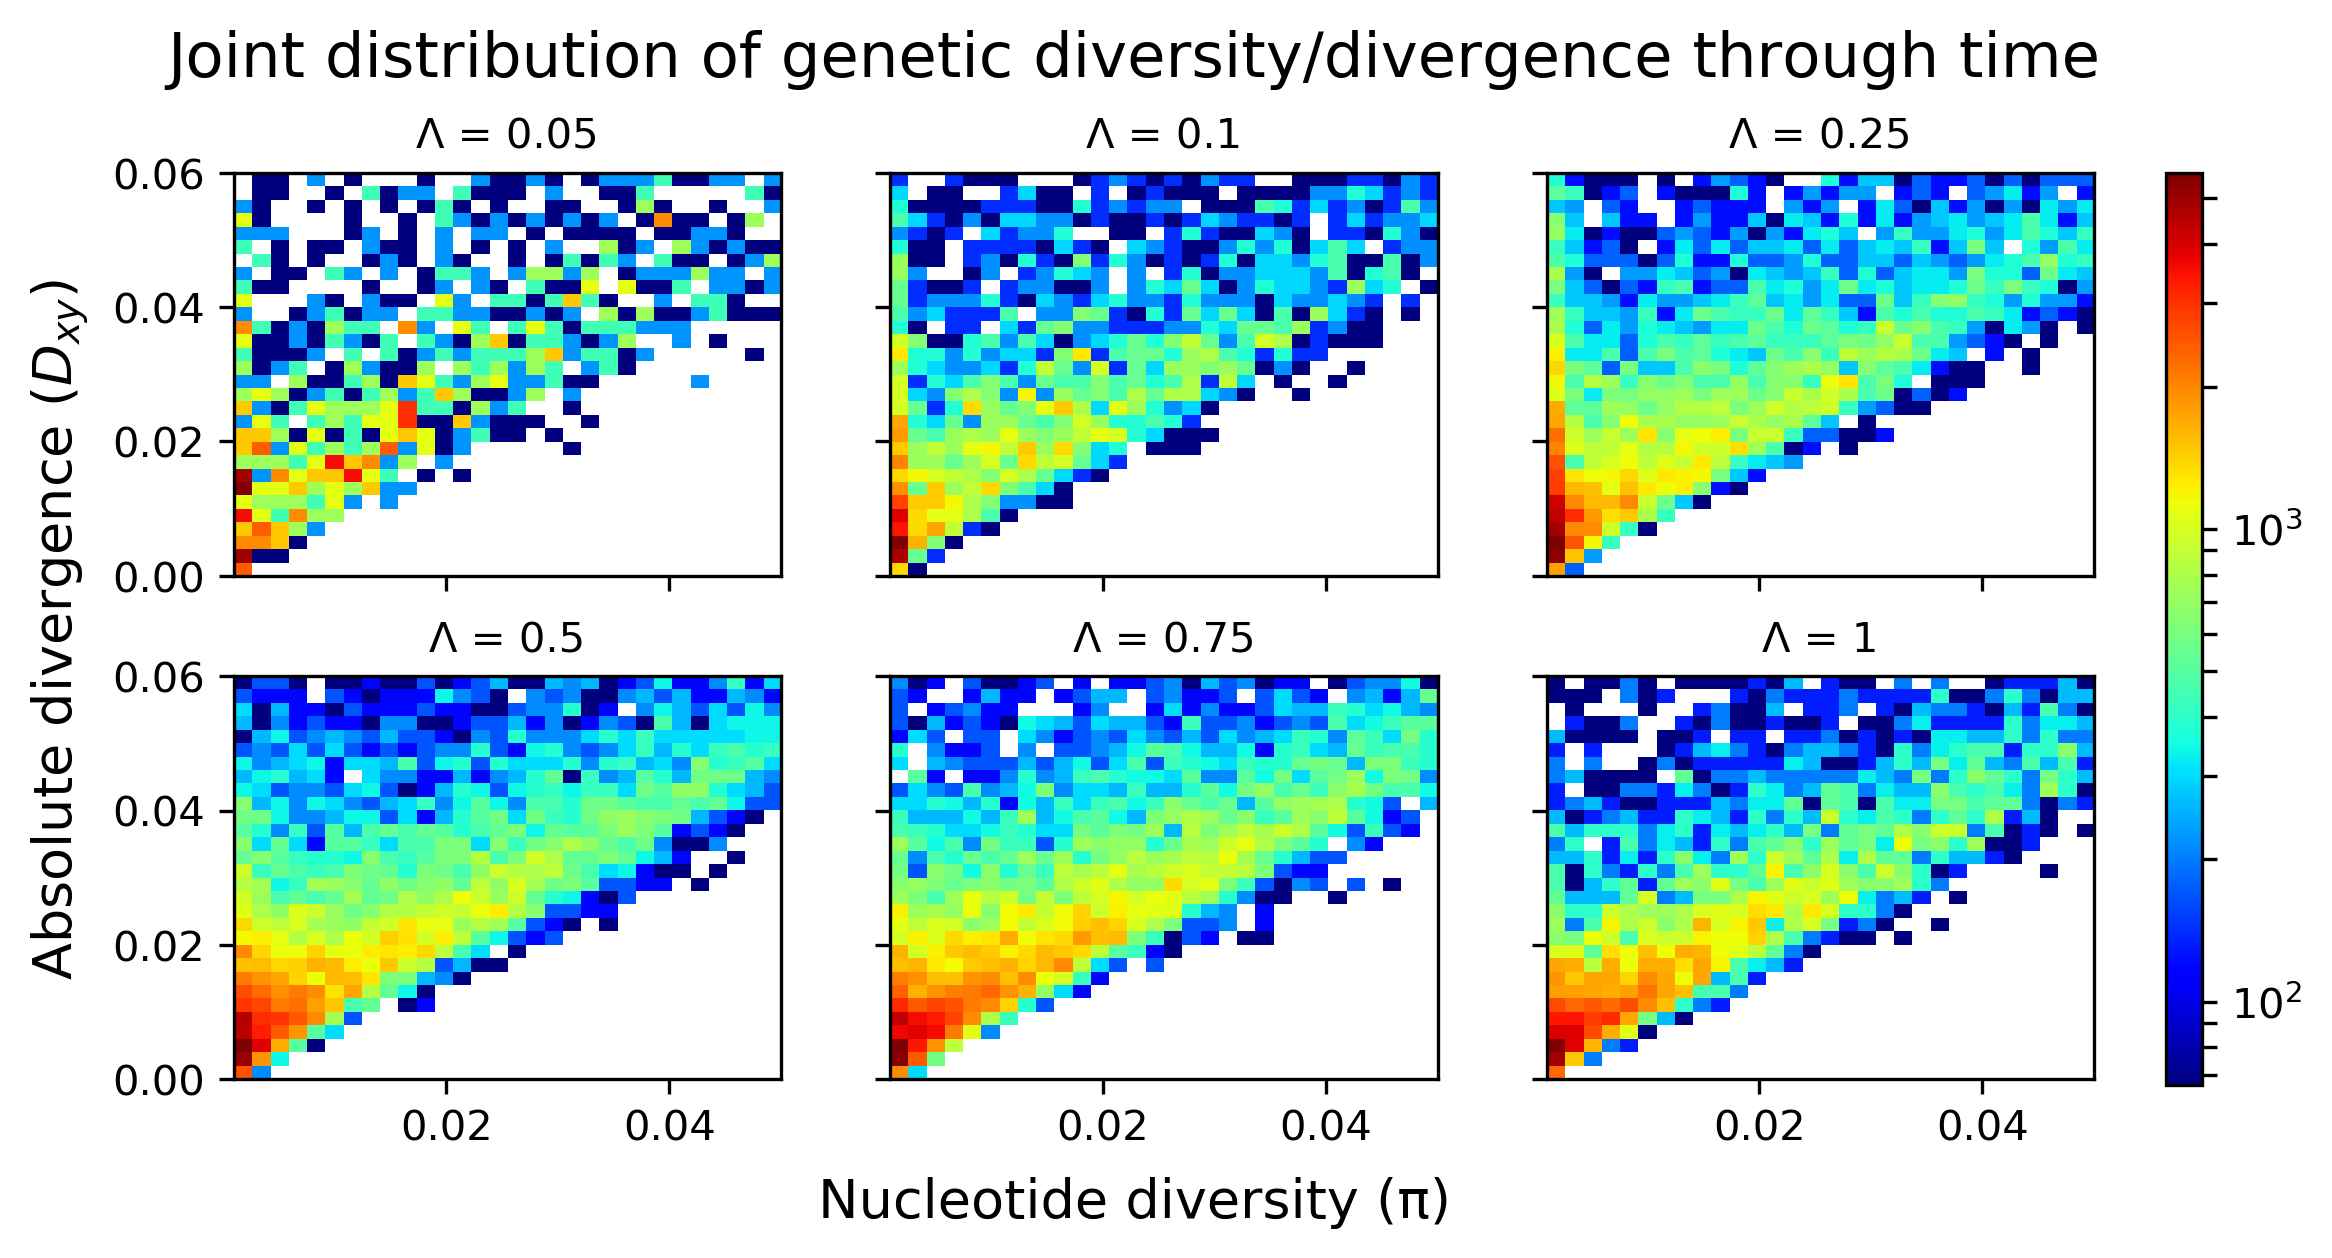

In [8]:
plot_pi_dxys(constant)

[8053, 8608, 5249, 6179, 4449, 9721]


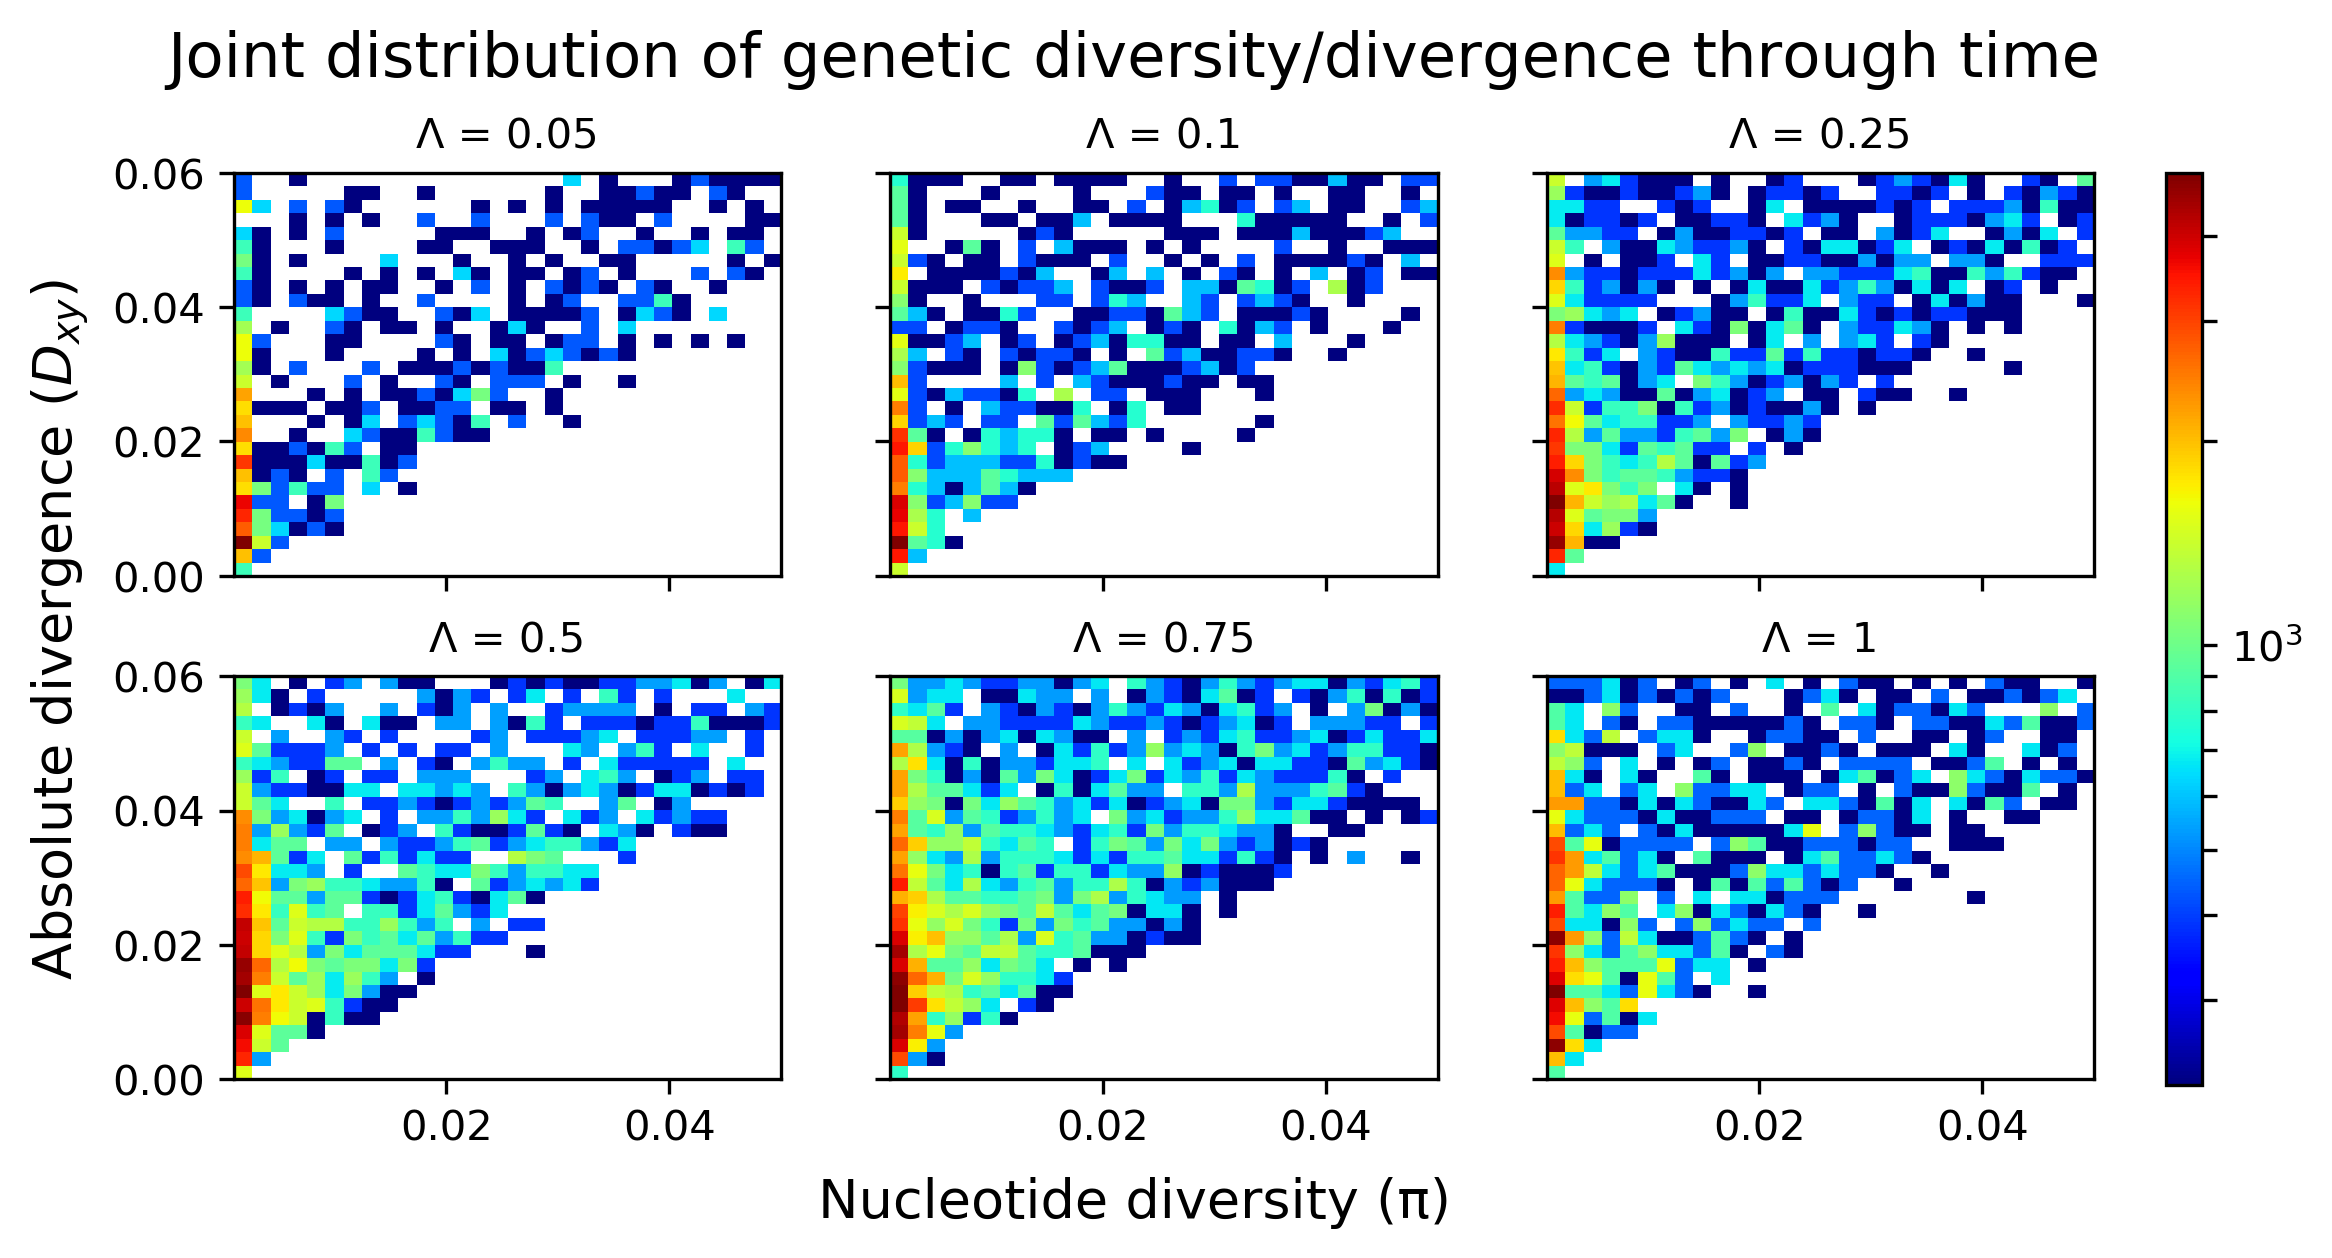

In [280]:
plot_pi_dxys(harmonic)

[12517, 15331, 6367, 8263, 8753, 16217]


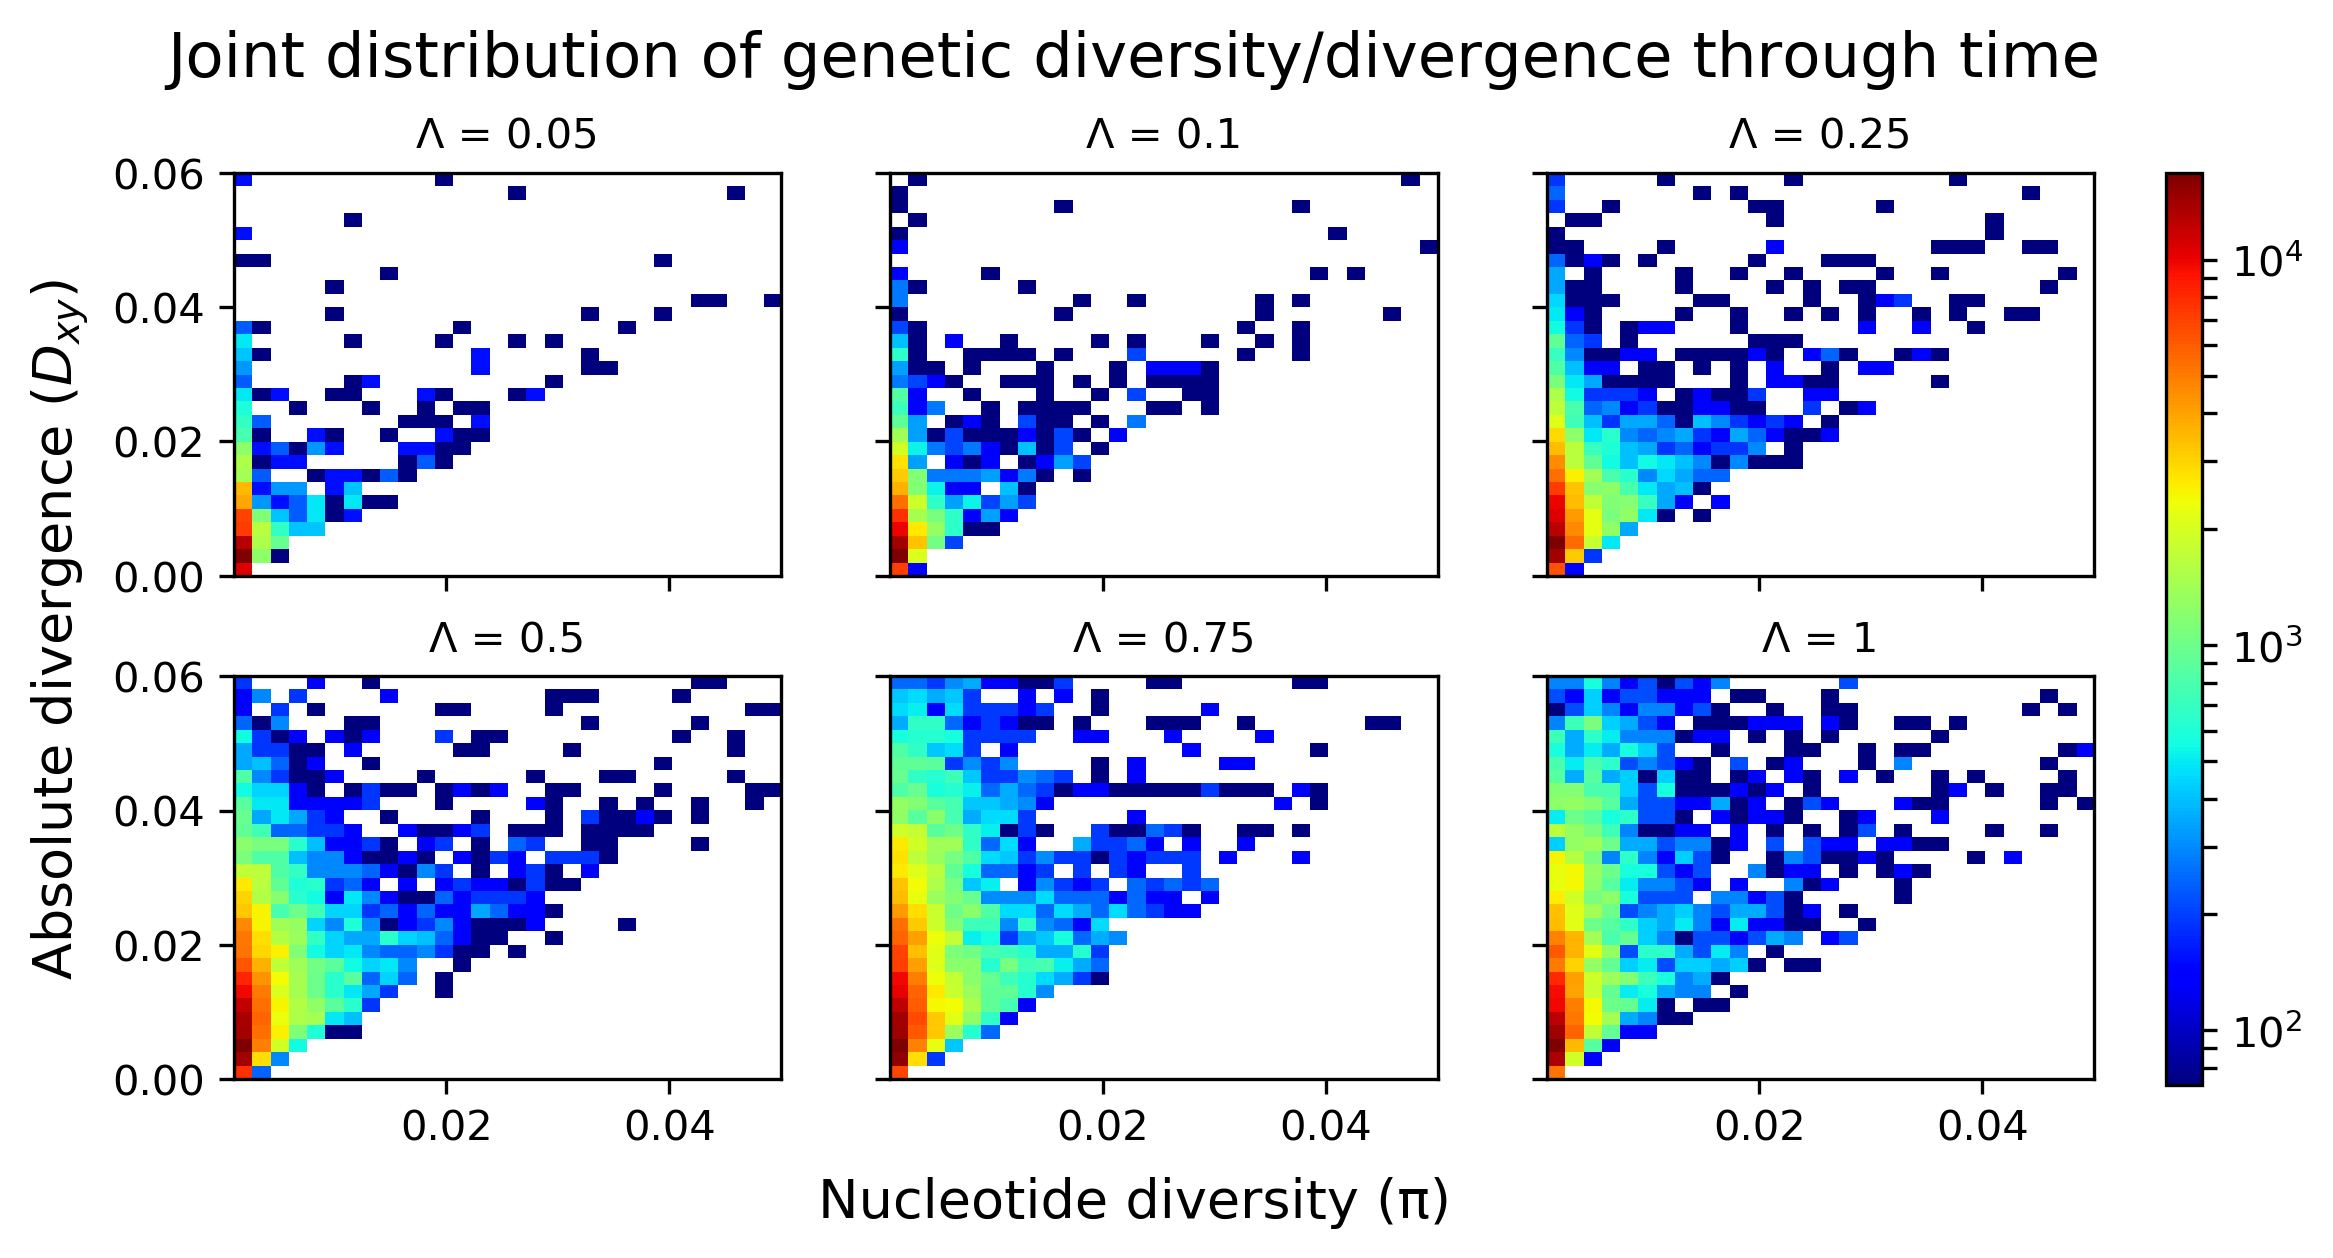

In [303]:
## This is harmonic with reduced migration
plot_pi_dxys(harmlessmig)

[13101, 15498, 6804, 9728, 8596, 15872]


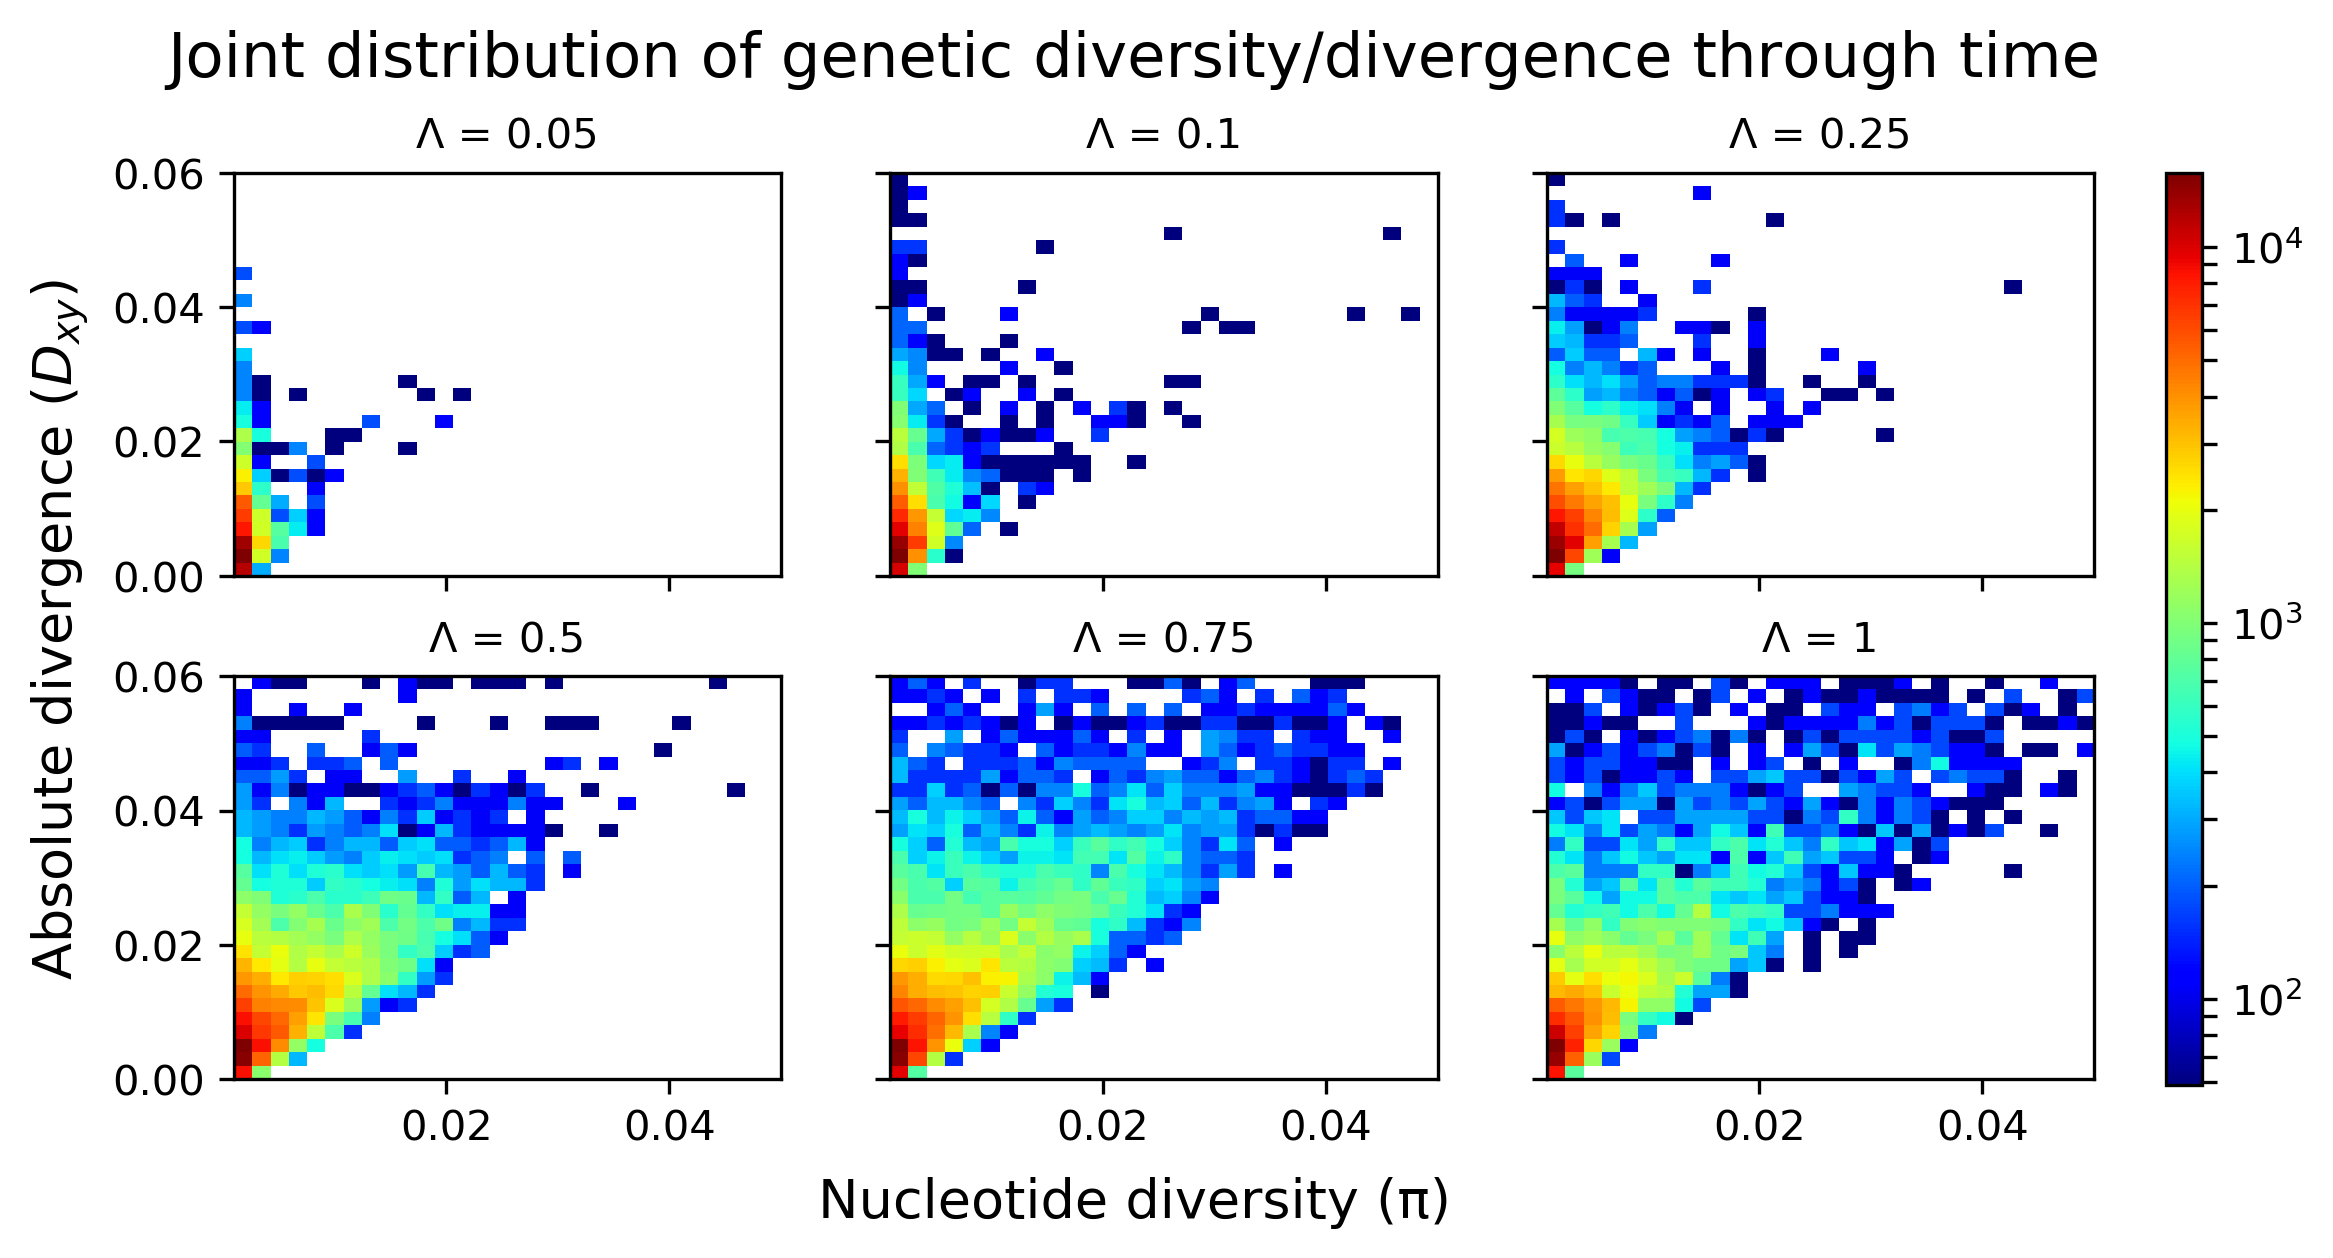

In [304]:
plot_pi_dxys(constlessmig)

[17432, 23128, 16505, 17046, 10201, 20827]


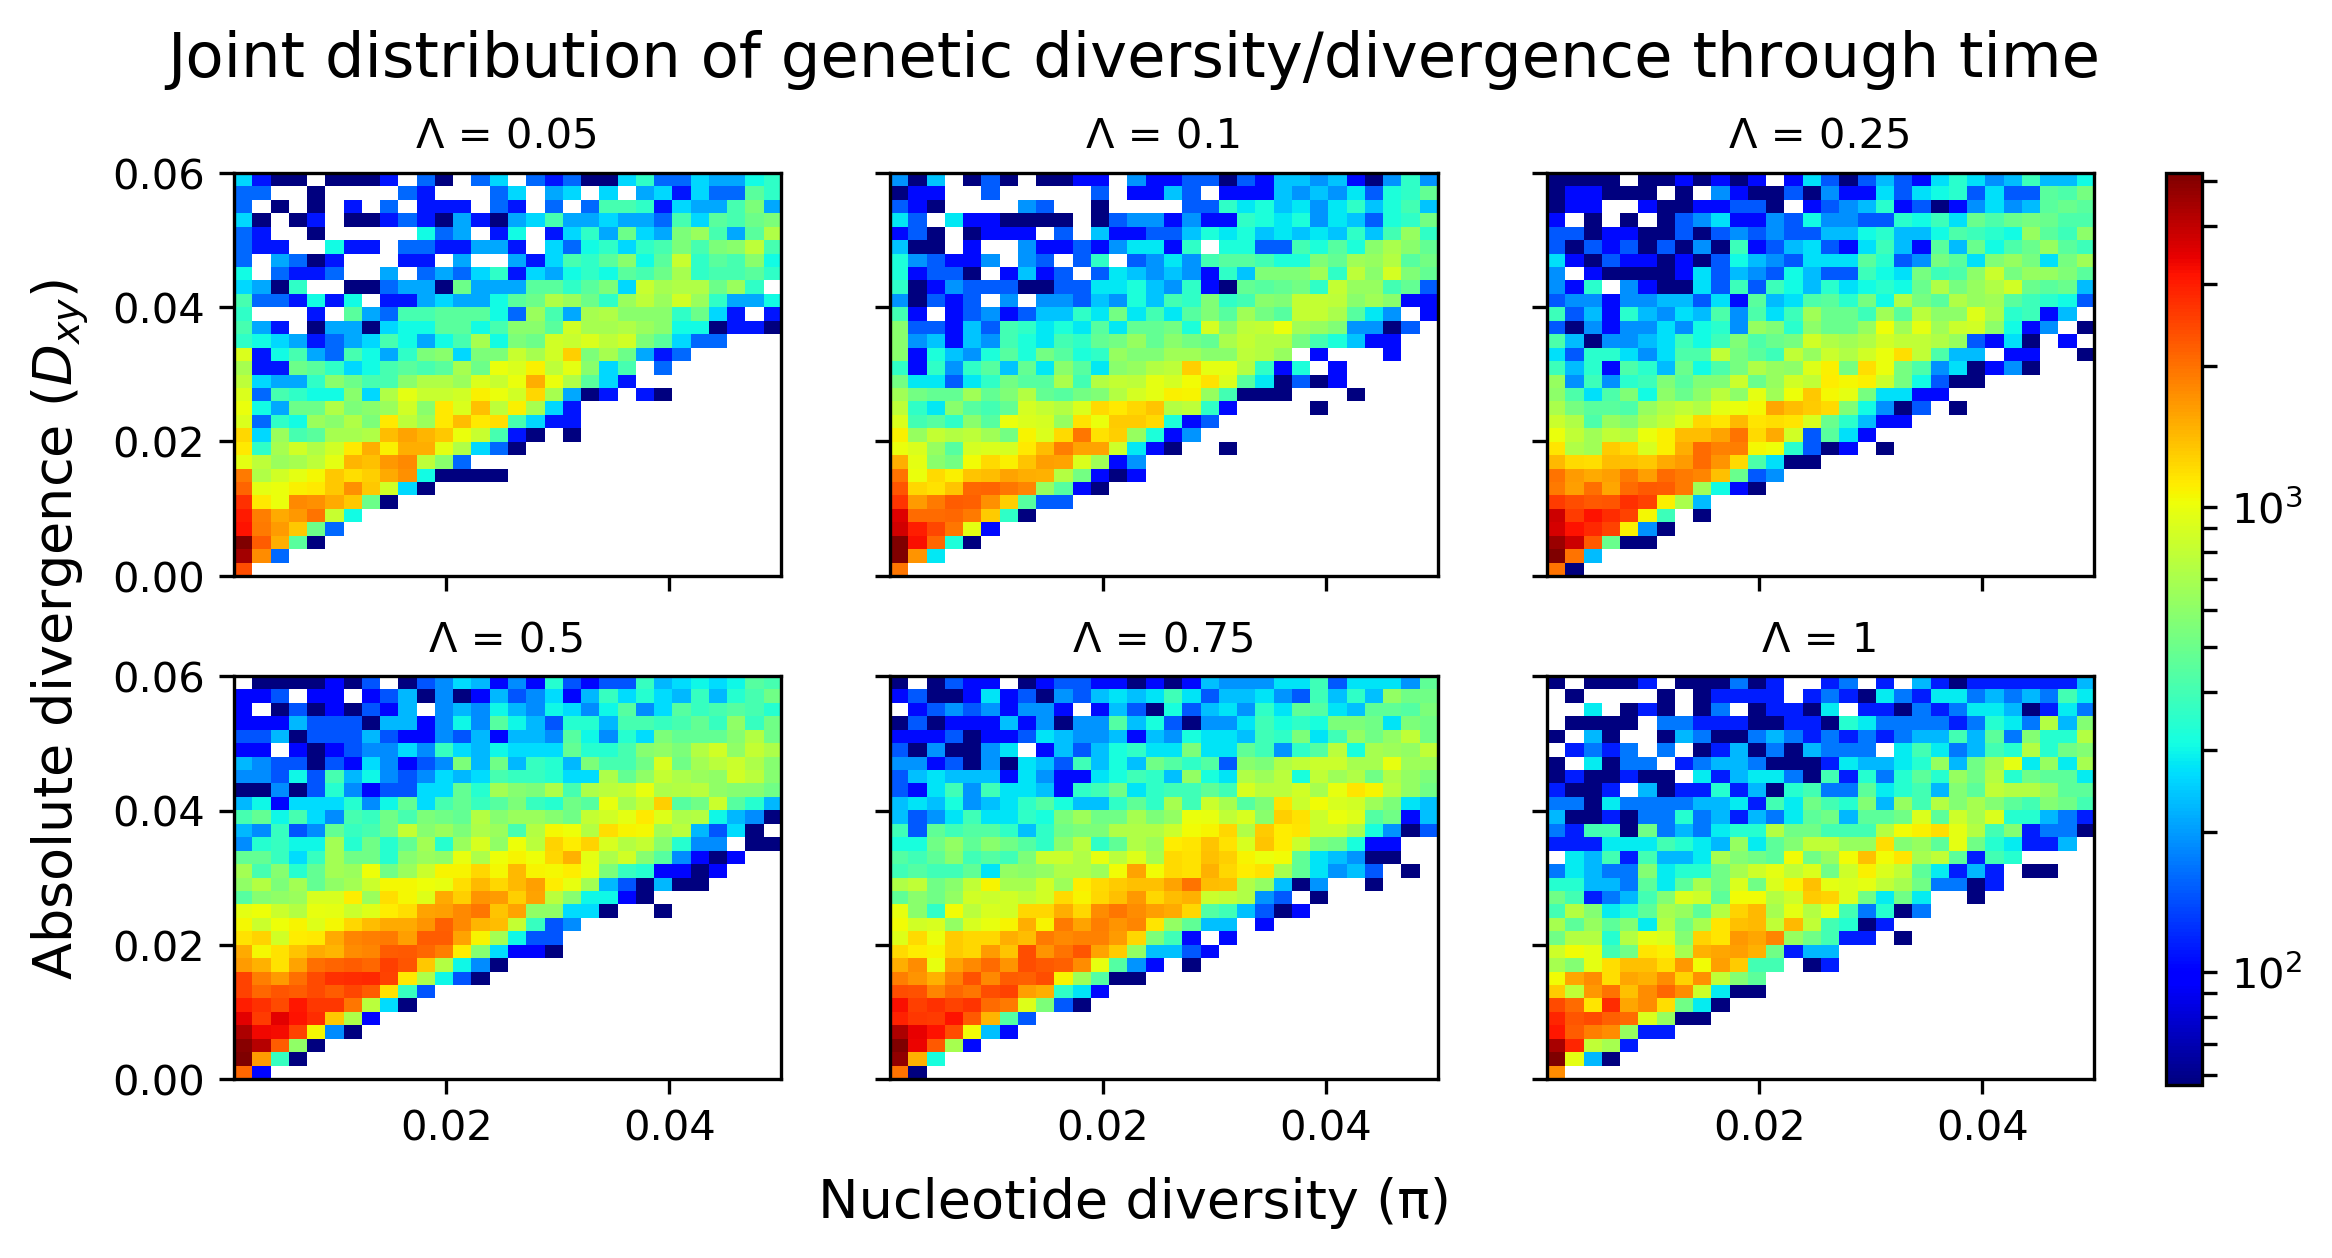

In [283]:
plot_pi_dxys(harmonic_5k)

[2291, 2530, 1870, 2067, 1328, 2473]


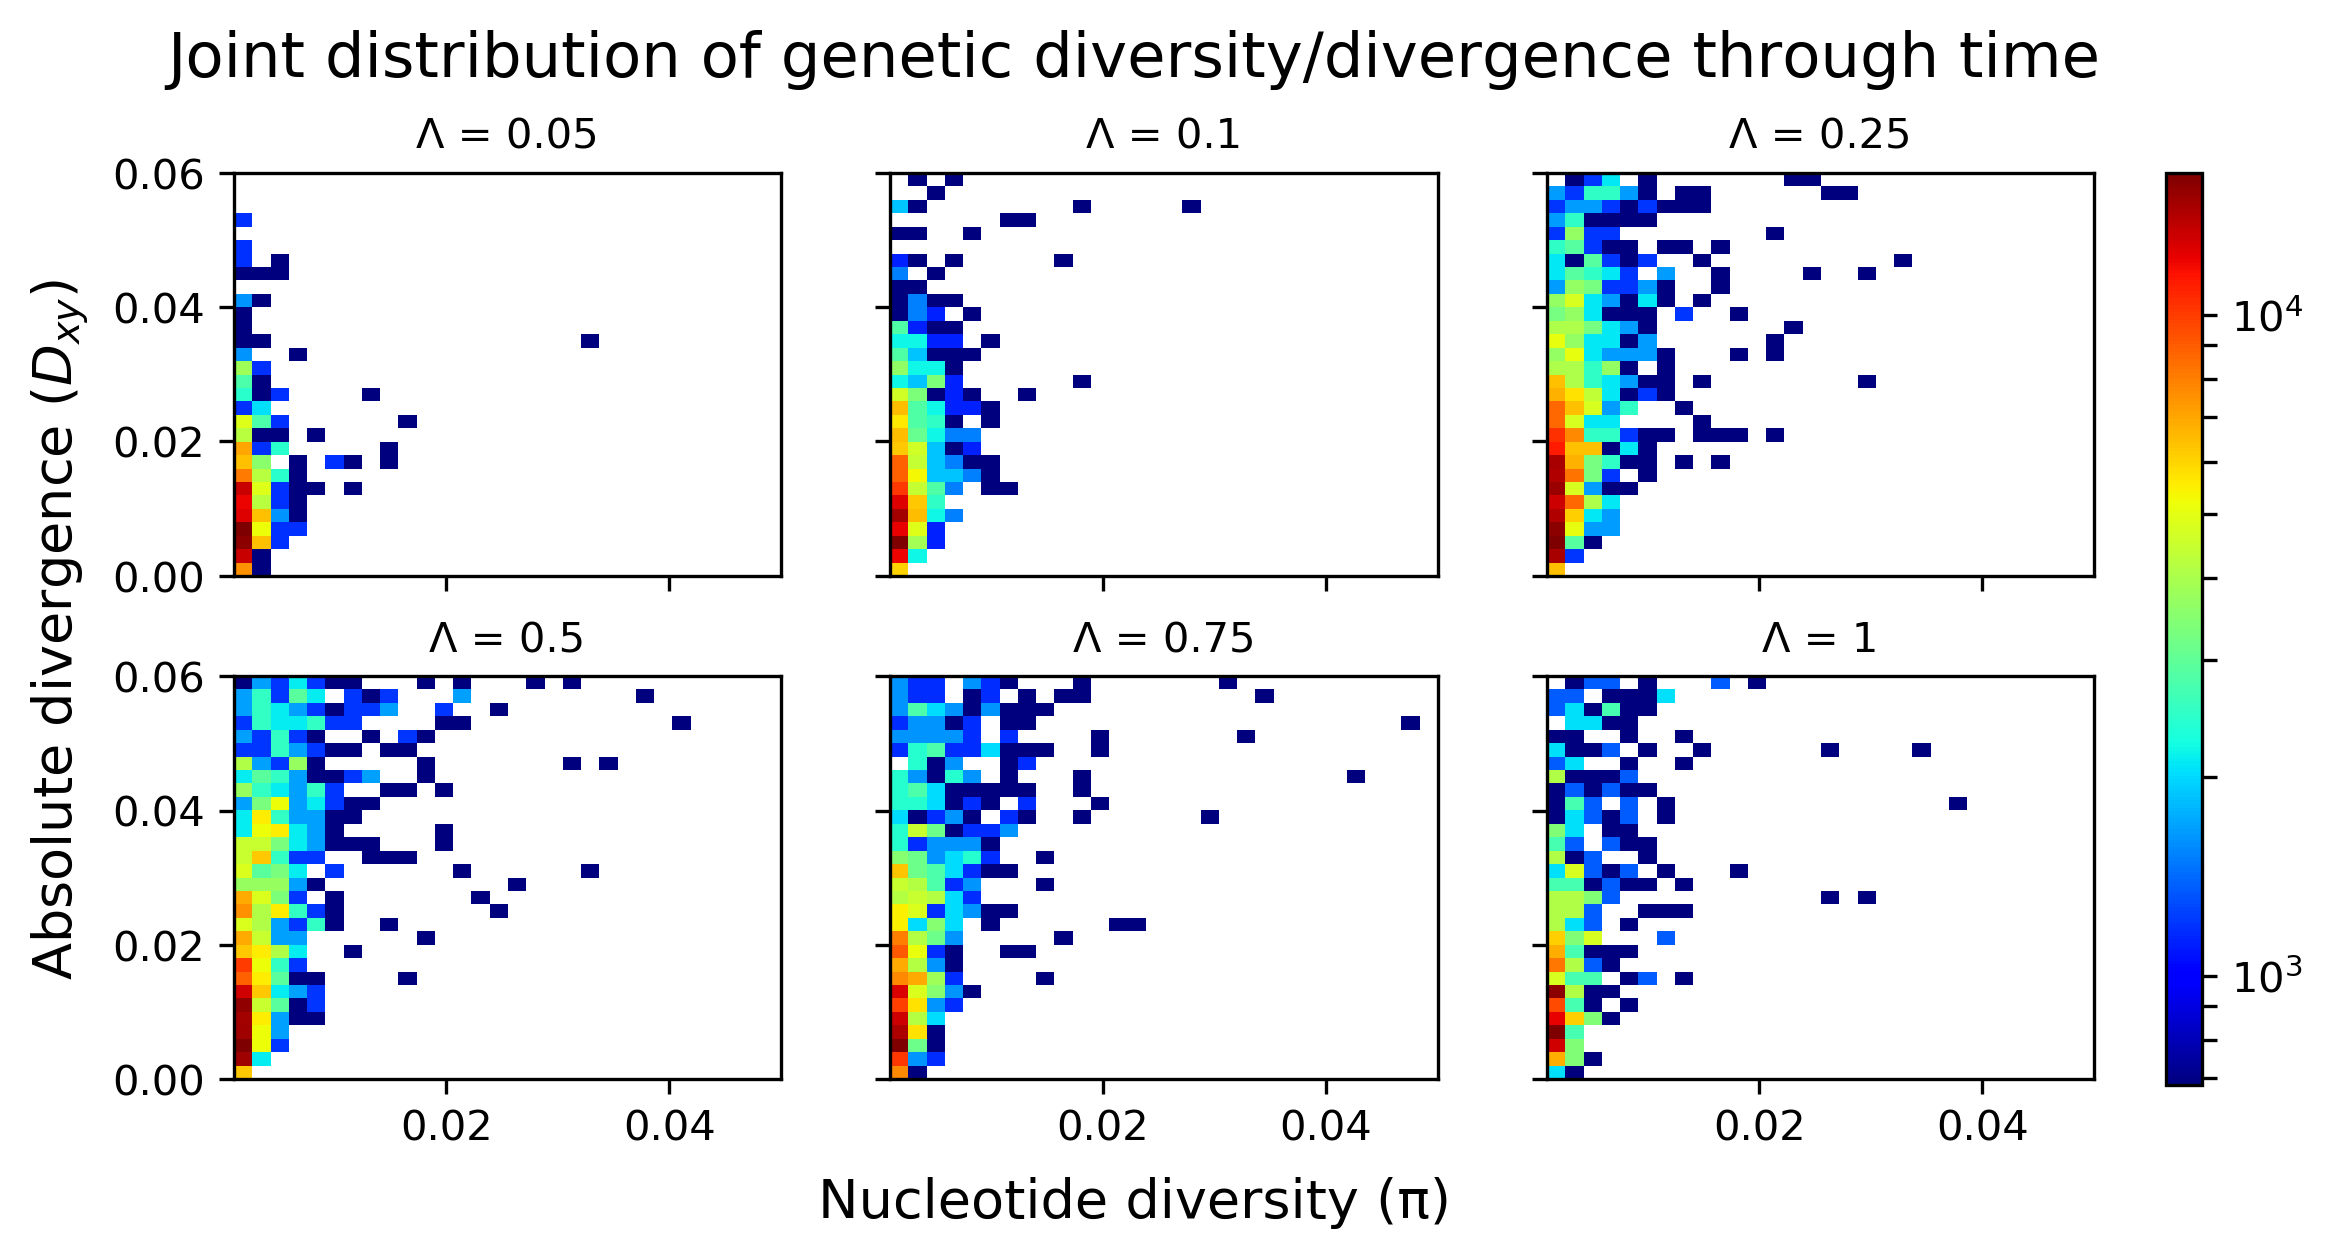

In [305]:
plot_pi_dxys(harmonic_vlow)

[289, 154, 339, 295, 339]


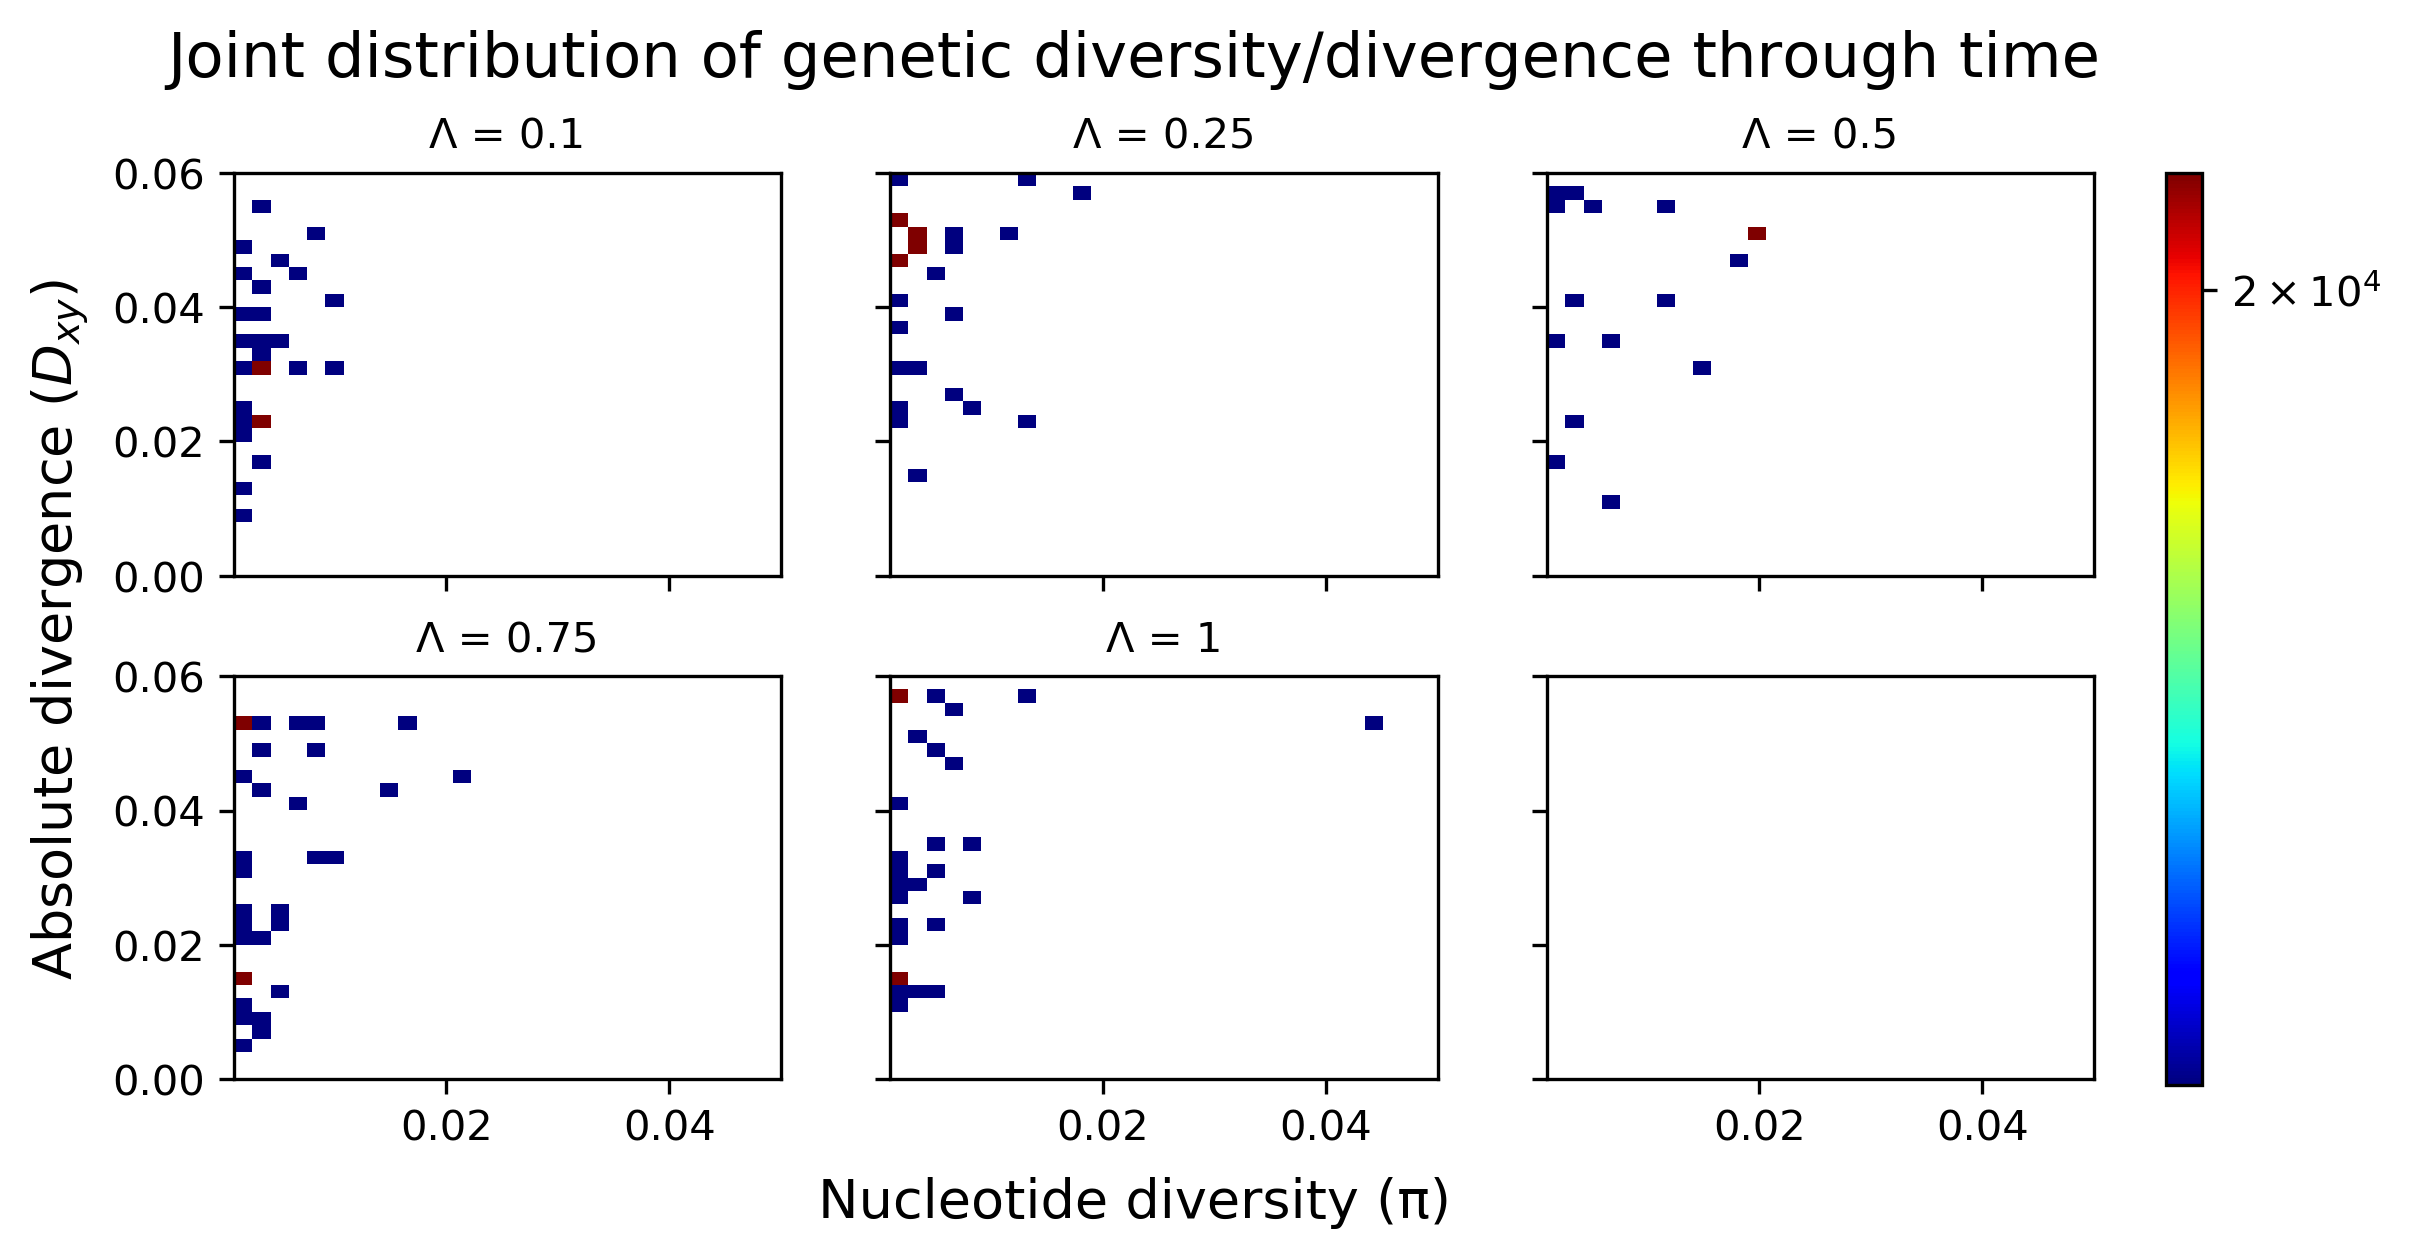

In [18]:
plot_pi_dxys(harm5k_vlow)

# Figure 3

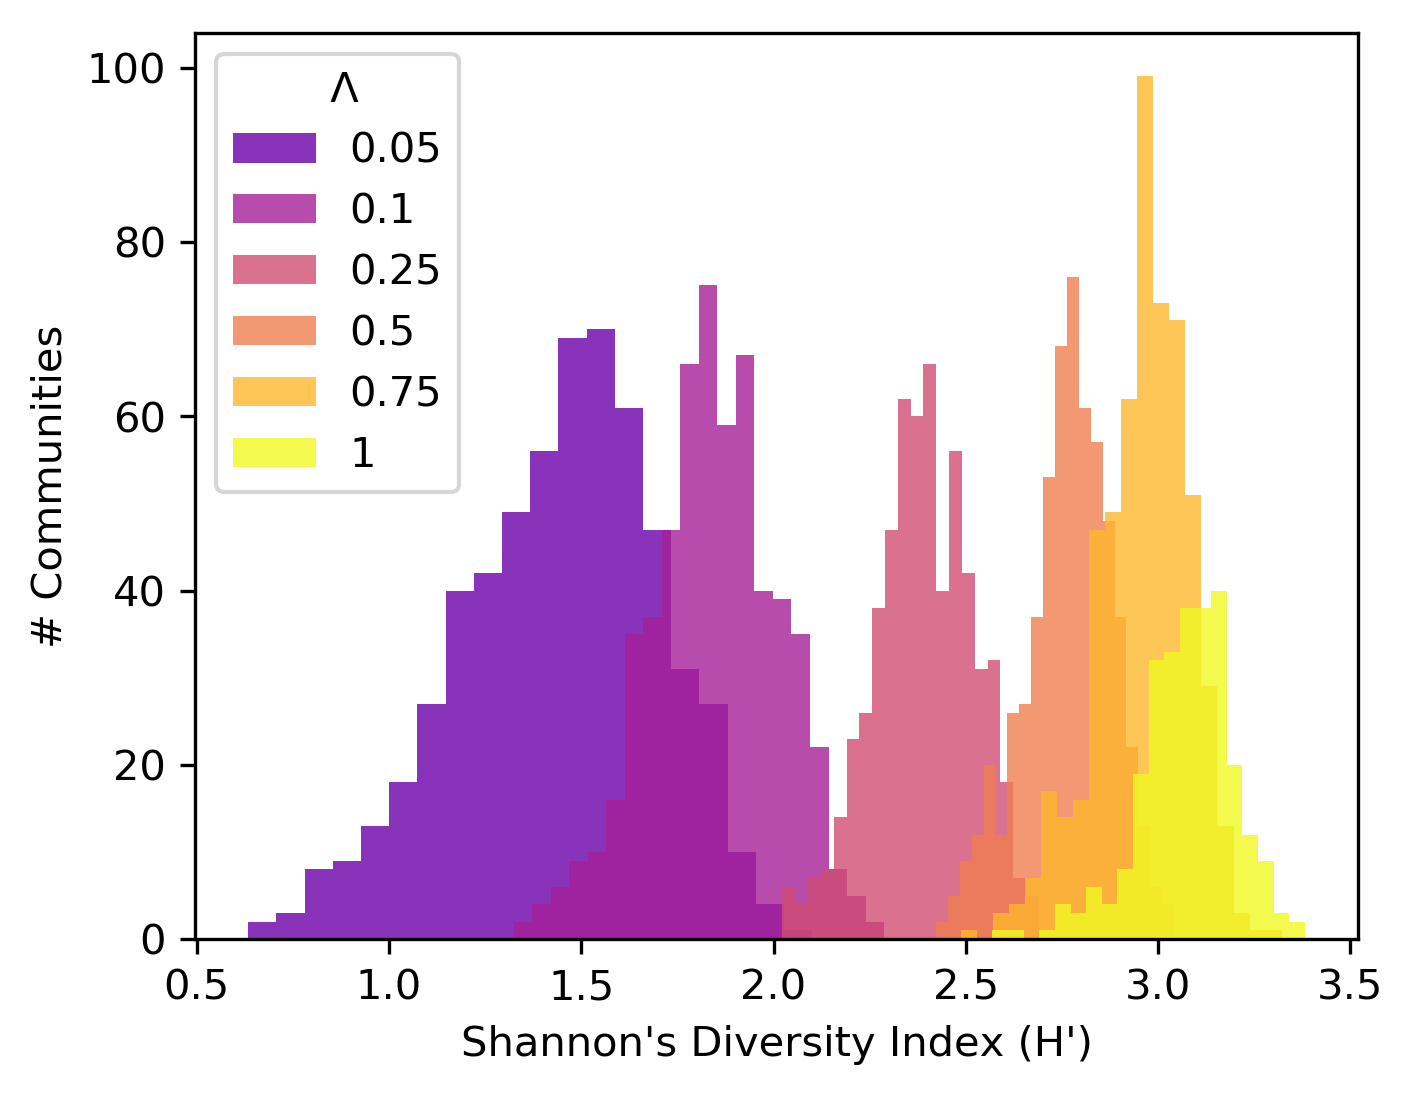

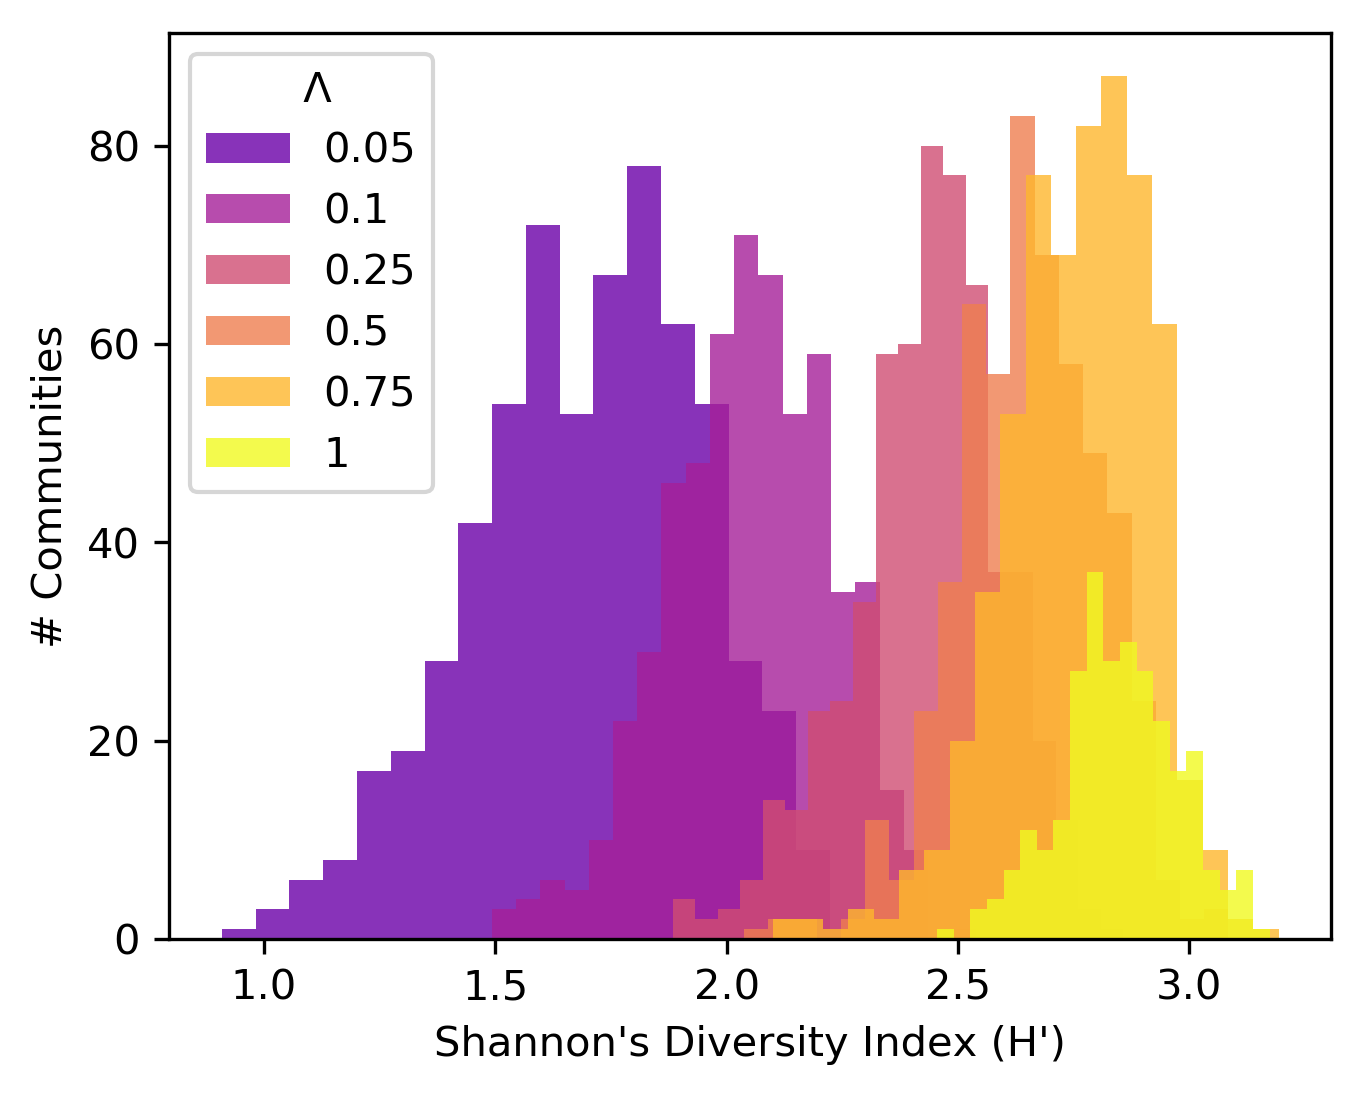

In [96]:
def plot_stat_per_lambda(simout_file, stat="shannon"):
    import matplotlib as mpl
    mpl.rc('font',family='Times New Roman') 

    time_tolerance = 0.03
    sampling_lambdas = [0.05, 0.1, 0.25, 0.5, 0.75, 1]

    simout_df = pd.read_csv(simout_file, sep="\t")

    ## Plot
    f, ax = plt.subplots(1, figsize=(5,4), dpi=300)
    ## Set up the colors
    gradient = np.linspace(0.2, 1, 6)
    cm = plt.cm.get_cmap('plasma')
    #cm = plt.cm.get_cmap('binary')

    for i,l in enumerate(sampling_lambdas):
        ax.hist(simout_df[(abs(simout_df['_lambda'] - l) < time_tolerance)][stat], normed=False, label=[l], color=cm(gradient[i], alpha=0.8), bins=20)
        L = ax.legend(title=u" Λ")
        #plt.setp(L.texts, family='Times New Roman')
        ax.set_xlabel("Shannon's Diversity Index (H')")
        ax.set_ylabel("# Communities")
        
    #plt.savefig("/home/isaac/gimmeSAD/ShannonThroughTime.svg")

plot_stat_per_lambda("MESS/constant_MESS/SIMOUT.txt", stat="shannon")
plot_stat_per_lambda("MESS/harmonic_MESS/SIMOUT.txt", stat="shannon")

In [18]:
tol = 0.03
simout_df = pd.read_csv("MESS/default_MESS/SIMOUT.txt", sep="\t")
simout_df[(abs(simout_df['_lambda'] - 0.5) < tol)]

,_lambda,generation,K,colrate,colrate_calculated,extrate_calculated,R,shannon,mean_pi,stdv_pi,...,sgd,trees,mean_ltr,var_ltr,mean_rtr,var_rtr,mean_dif,var_dif,kurtosis,skewness
32,0.514,14146,1000,0.05,0.047293,0.009048,47,2.804618,0.028841,0.041093,...,[18 1 0 0 0 0 0 0 0 0 5 2 0 0 0 ...,NaN,0.458692,10.879192,0.824659,10.084308,0.365967,-0.794884,NaN,0.093371
38,0.507,17228,1000,0.05,0.049977,0.009577,39,2.905169,0.035728,0.038410,...,[12 0 0 0 0 0 0 0 0 0 1 8 0 0 0 ...,NaN,0.092127,9.834554,0.824659,10.084308,0.732532,0.249755,NaN,0.169177
65,0.490,12898,1000,0.05,0.049310,0.007753,43,2.710820,0.028286,0.036858,...,[21 3 1 0 0 0 0 0 0 0 0 0 4 1 0 ...,NaN,0.399817,11.295912,0.824659,10.084308,0.424842,-1.211603,NaN,0.029564
69,0.523,14718,1000,0.05,0.048036,0.007406,49,2.834122,0.033500,0.049039,...,[23 0 0 0 0 0 0 0 0 0 6 2 0 0 0 ...,NaN,0.473034,10.499235,0.824659,10.084308,0.351625,-0.414927,NaN,0.125658
88,0.506,19668,1000,0.05,0.050946,0.009152,45,2.752981,0.038099,0.056650,...,[25 0 0 0 0 0 0 0 0 0 1 1 2 0 0 ...,NaN,0.150936,9.876679,0.824659,10.084308,0.673723,0.207630,NaN,0.244910
96,0.522,16003,1000,0.05,0.049928,0.008936,45,2.804546,0.035359,0.042918,...,[18 3 0 0 0 0 0 0 0 0 3 3 2 2 0 ...,NaN,0.606437,12.053843,0.824659,10.084308,0.218222,-1.969535,NaN,0.007510
101,0.524,11432,1000,0.05,0.050297,0.007960,44,2.870243,0.038722,0.064709,...,[27 9 0 0 0 0 0 0 0 0 1 1 1 1 0 ...,NaN,0.541419,12.640655,0.824659,10.084308,0.283241,-2.556347,NaN,0.100522
105,0.479,13397,1000,0.05,0.046652,0.007240,37,2.507618,0.041826,0.081354,...,[20 0 0 0 0 0 0 0 0 0 8 2 0 0 0 ...,NaN,0.956825,11.406937,1.081589,9.833708,0.124764,-1.573229,NaN,0.494971
134,0.472,10772,1000,0.05,0.049851,0.007612,38,2.741613,0.032715,0.058992,...,[25 1 0 0 0 0 0 0 0 0 0 6 1 0 0 ...,NaN,1.374813,11.662447,1.081589,9.833708,-0.293224,-1.828738,NaN,0.471371
149,0.478,11486,1000,0.05,0.049539,0.006617,31,2.455209,0.053872,0.087354,...,[18 0 0 0 0 0 0 0 0 0 3 2 0 0 0 ...,NaN,1.178859,11.709074,1.081589,9.833708,-0.097270,-1.875366,NaN,0.352691


# Crap below here

[4279, 4392, 2123, 2881, 3742, 4954]
[3490, 4936, 2013, 3175, 3234, 4675]


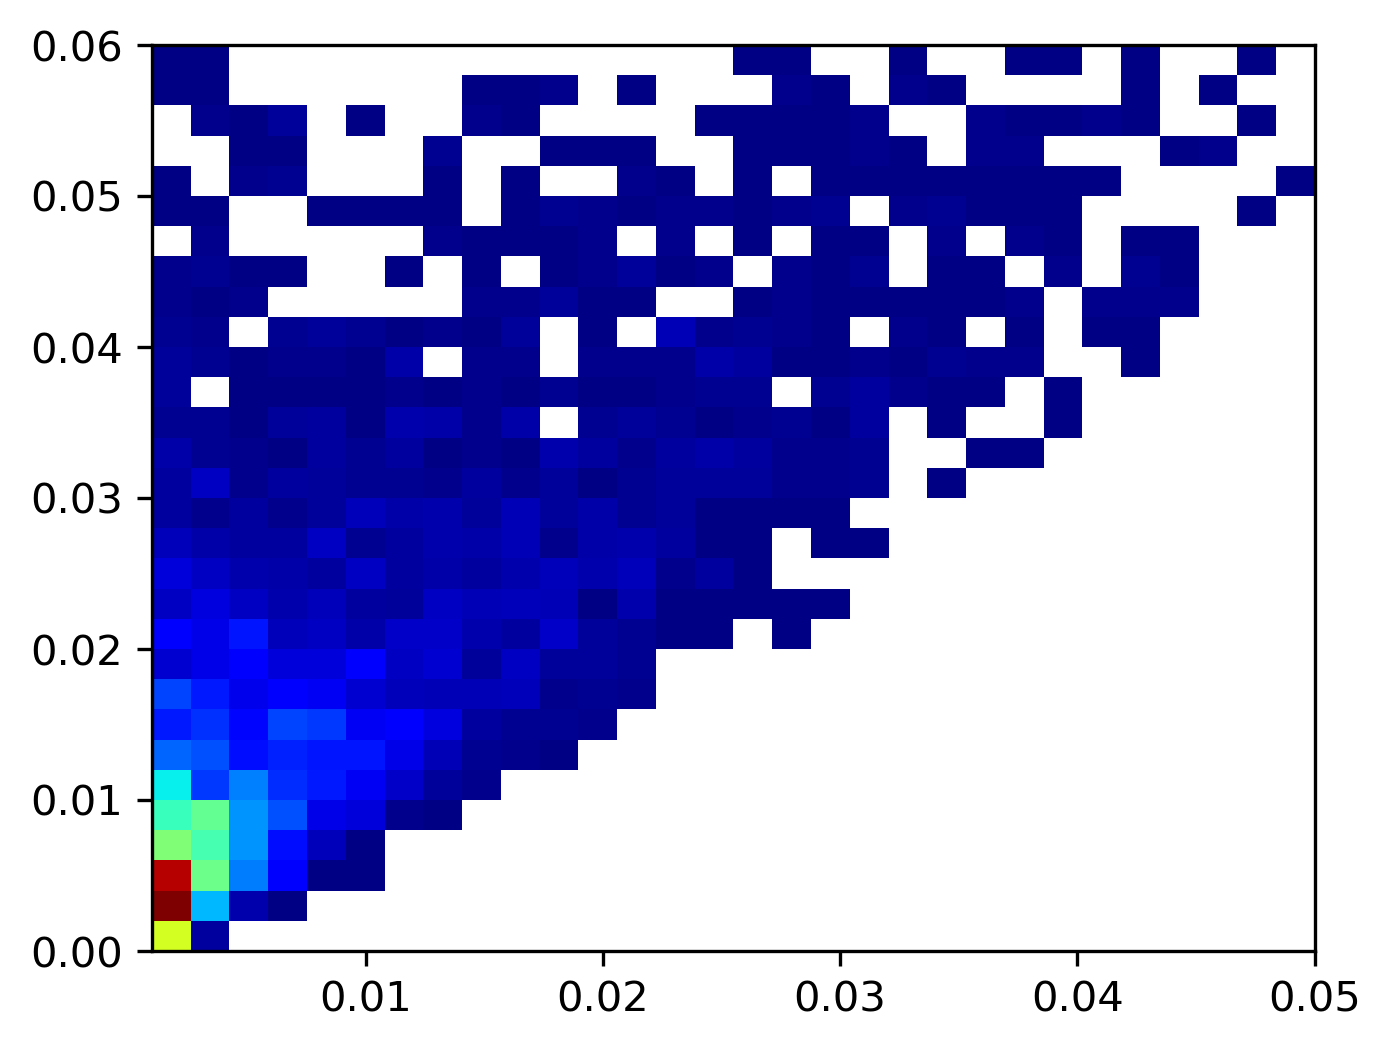

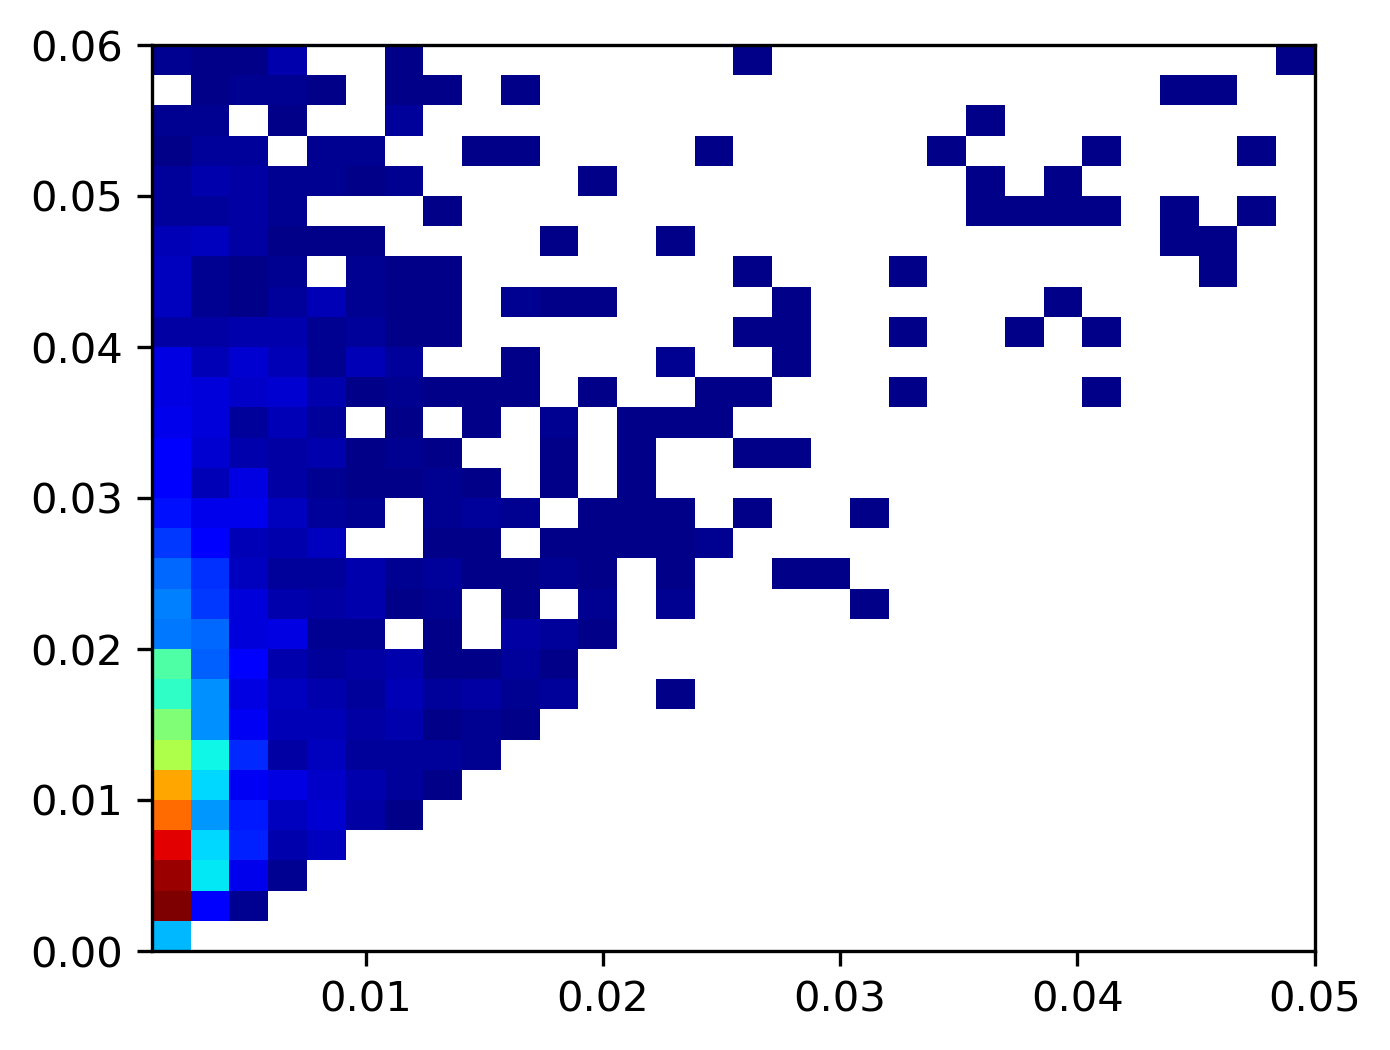

In [61]:
constlessmig = glob.glob("MESS/constlessmig_MESS/wat-*/*megalog.txt")
const_dict = populate_lambda_dists(constlessmig)

lessmig = glob.glob("MESS/lessmig_MESS/wat-*/*megalog.txt")
harm_dict = populate_lambda_dists(lessmig)

cmap = plt.cm.get_cmap("jet")
cmap.set_under('white')
    
f, ax = plt.subplots(1, figsize=(5,4), dpi=300)
const_matrix, _, _, _ = ax.hist2d(const_dict[0.75]["pi_local"], const_dict[0.75]["dxy"], bins=30, cmap=cmap, normed=True, vmin=0.001, range=[[0.001, 0.05], [0, 0.06]])

f, ax = plt.subplots(1, figsize=(5,4), dpi=300)
harm_matrix, xedges, yedges, _ = ax.hist2d(harm_dict[0.75]["pi_local"], harm_dict[0.75]["dxy"], bins=30, cmap=cmap, normed=True, vmin=0.001, range=[[0.001, 0.05], [0, 0.06]])


In [60]:
print(const_dict[0.75])

    name     tdiv  migration_rate  growth_rate  Ne_local  Ne_meta  \
0   t133   3091.6        0.000003            0     12600     1100   
1   t275   1189.6        0.000000            0      2500     1400   
2   t199   3485.5        0.000000            0       300      100   
3   t334  11249.0        0.000009            0      7300     1300   
4   t218    181.6        0.000000            0       100      100   
5   t191    242.0        0.000000            0       200      300   
6   t116   3919.6        0.000000            0      3200      300   
7   t548    410.3        0.000000            0       200      100   
8   t443   3467.2        0.000019            0      1500      500   
9   t541    166.5        0.000000            0       200      200   
10  t152     68.1        0.000000            0       200     1200   
11  t685   1315.5        0.000000            0      2100      200   
12  t299    668.5        0.000000            0       100     1100   
13  t935   1700.1        0.000000 

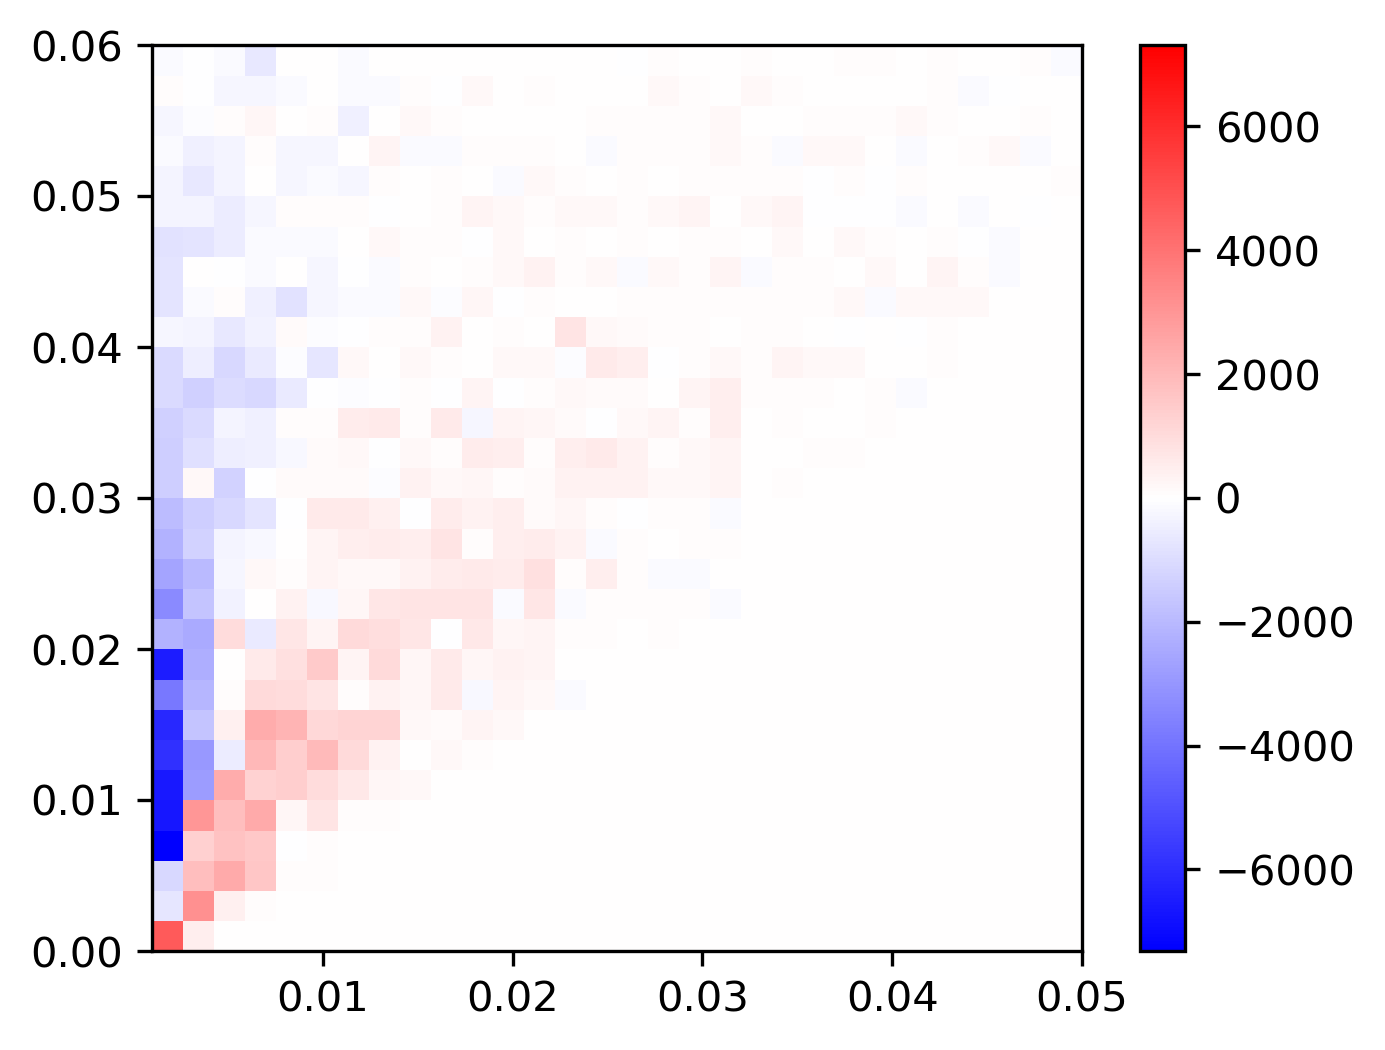

In [81]:
from matplotlib import colors

f, ax = plt.subplots(1, figsize=(5,4), dpi=300)
resid = np.subtract(const_matrix, harm_matrix).T
#print(resid)
#ax.hist2d(xedges, yedges, resid)
X, Y = np.meshgrid(xedges, yedges)
maxval = np.max([abs(np.min(resid)), np.max(resid)])
plt.pcolormesh(X, Y, resid, cmap="bwr", vmin=-maxval, vmax=maxval)
cbar = plt.colorbar()

## Positive values favor the constant size model and negative values favor harmonic

In [13]:
lambdas = [0.1, 0.25, 0.5, 0.75, 1]

def get_octave_bin_edges(lambda_dict, param="Ne_local"):
    min_edge = 1
    max_edge = 2
    octaves_edges = [1]
    max_abund = max([x[param].max() for x in lambda_dict.values()])/100
    while max_edge < max_abund:
        octaves_edges.append(max_edge)
        min_edge *= 2
        max_edge *= 2
    octaves_edges.append(max_edge * 2)

def plot_sad_sgd(megalogs, lambdas=lambdas):

    ## dictionary keyed by lambda values
    lambda_dict = populate_lambda_dists(megalogs)

    ##
    from matplotlib.colors import LogNorm

    
    f, axarr = plt.subplots(len(lambdas), 2, figsize=(4,8), dpi=300)#, sharex=True, sharey=True)
    axarr = [a for b in axarr for a in b]
    cmap="jet"
    rang=[[0.001, 0.05], [0, 0.06]]
    for i, k in zip(xrange(0,len(lambdas*2), 2), lambdas):
        ax.set_title(u"Λ = {}".format(k), fontsize=10)
        _, _, _, im = axarr[i].hist2d(lambda_dict[k]["pi_local"], lambda_dict[k]["dxy"], bins=20, cmap=cmap, norm=LogNorm(), normed=True, range=rang)
        _ = axarr[i+1].hist(lambda_dict[k]["Ne_local"], bins=get_octave_bin_edges(lambda_dict), density=False, log=True)
        
    f.text(0.5, 0.01, u"Nucleotide diversity (π)", ha='center', fontsize=13)
    f.text(0.04, 0.5, r"Absolute divergence ($D_{xy}$)", va='center', rotation='vertical', fontsize=13)
    plt.suptitle("Joint distribution of genetic diversity/divergence through time", y=.9999, fontsize=15)
    plt.subplots_adjust(hspace=.25)
    plt.tight_layout()
    cb_ax = f.add_axes([0.93, 0.12, 0.015, 0.76])
    cbar = f.colorbar(im, cax=cb_ax)


[2291, 2530, 1870, 2067, 1328, 2473]


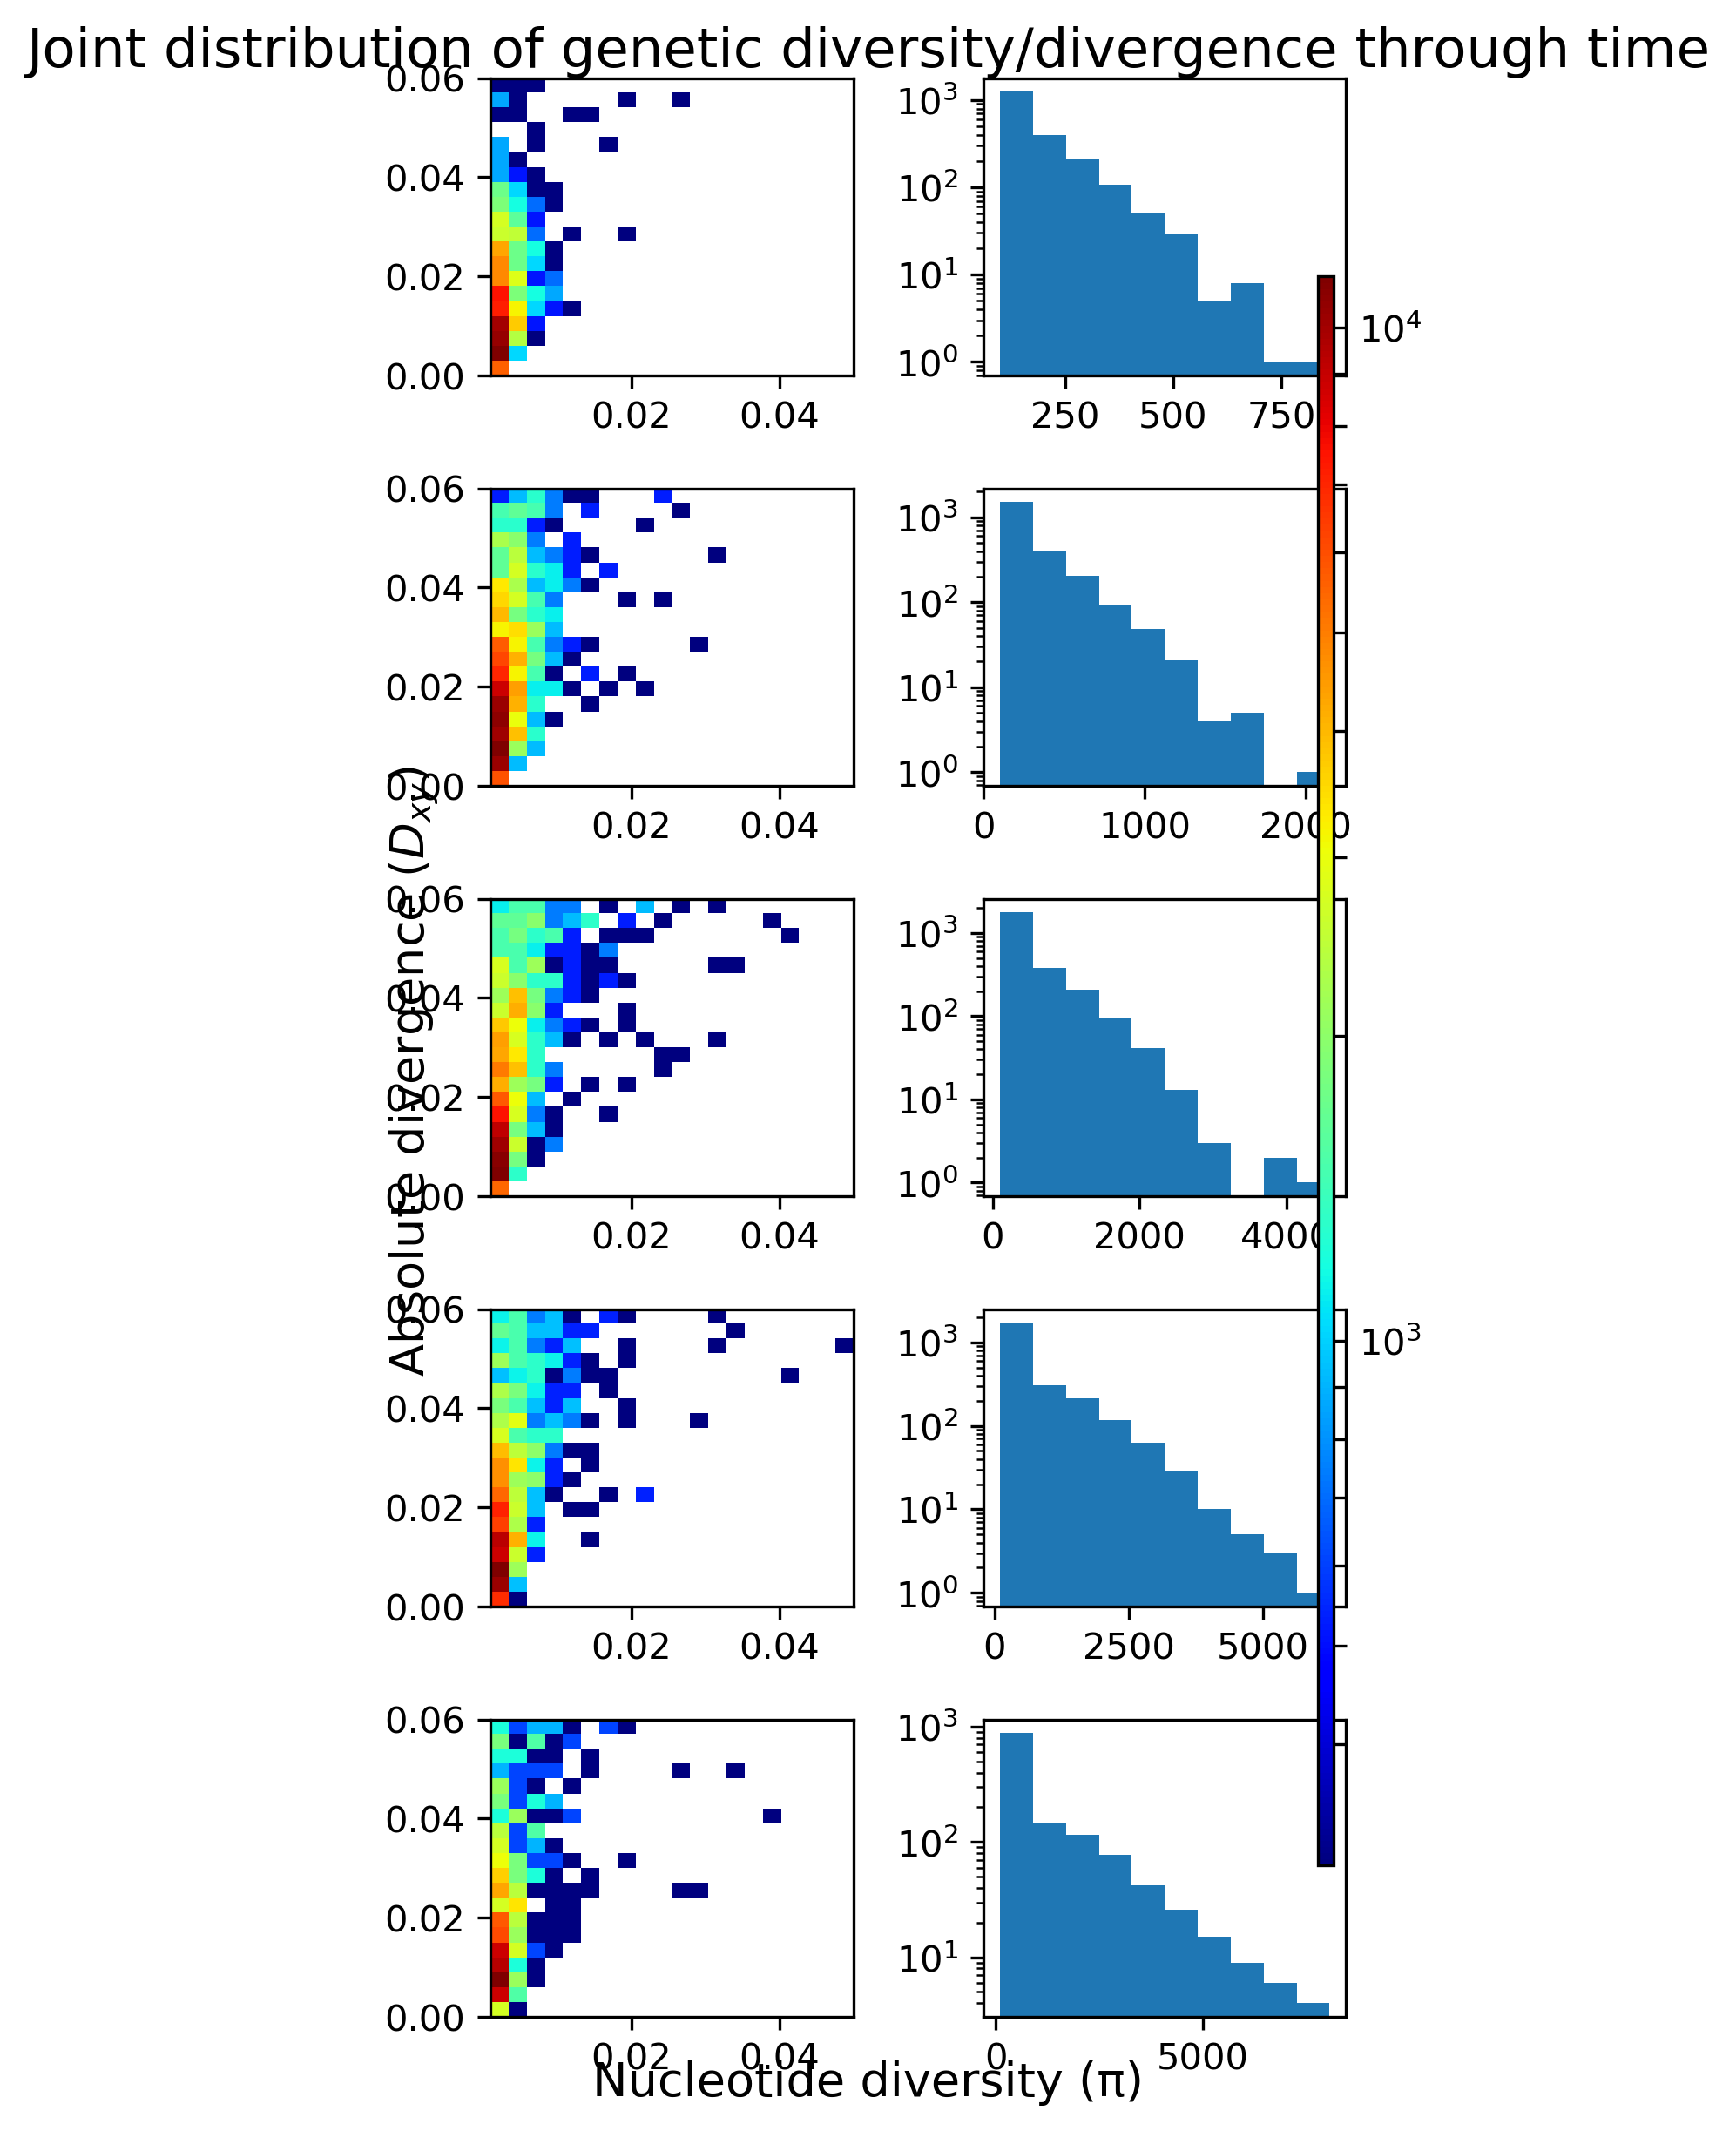

In [14]:
plot_sad_sgd(harmonic_vlow)